<a href="https://colab.research.google.com/github/msaipraveenkumar/EDA_Optimising_NYC_Taxis_msaipraveenkumar.zip/blob/main/EDA_Assg_NYC_Taxi_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [3]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()
df=pd.read_parquet('/content/sample_data/Trip_data/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/sample_data/Trip_data')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
  try:
    # file path for the current file
    file_path = os.path.join(os.getcwd(), file_name)

    # Reading the current file
    temp_data = pd.read_parquet(file_path)

    # Convert the 'tpep_pickup_datetime' column to datetime format
    temp_data['tpep_pickup_datetime'] = pd.to_datetime(temp_data['tpep_pickup_datetime'])

    # Create an empty dataframe to store the sampled data
    sampled_data = pd.DataFrame()


    # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
    # After completing iteration through each date, we will append this data to the final dataframe.
    sampled_hour = pd.DataFrame()


    # Loop through dates and then loop through every hour of each date
    for date in temp_data['tpep_pickup_datetime'].dt.date.unique():
      # Iterate through each date of the selected month
      date_data = temp_data[temp_data['tpep_pickup_datetime'].dt.date == date]

      for hour in range(24):
        # Iterate through each hour of the selected date
        hour_data = date_data[date_data['tpep_pickup_datetime'].dt.hour == hour]
        # Sample 5% of the hourly data randomly
        sampled_hour = hour_data.sample(frac=0.05, random_state=42)
        # Append the sampled data to the sampled_data dataframe
        sampled_data = pd.concat([sampled_data, sampled_hour])


    # Convert the 'tpep_dropoff_datetime' column back to datetime format
    temp_data['tpep_dropoff_datetime'] = pd.to_datetime(temp_data['tpep_dropoff_datetime'])

      # add data of this hour to the dataframe
      # Concatenate the sampled data of all the dates to a single dataframe
    df = pd.concat([df, sampled_data])# we initialised this empty DF earlier

  except Exception as e:
    print(f"Error reading file {file_name}: {e}")

In [6]:
df=pd.read_parquet('/content/sample_data/Trip_data/NYC_Taxi_sampled_data.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 372 to 3196303
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            fl

In [18]:
df['tpep_pickup_datetime'].value_counts()

,count
tpep_pickup_datetime,
2023-11-08 17:44:03,4
2023-07-24 20:58:58,4
2023-10-29 14:20:23,4
2023-02-16 08:22:29,4
2023-08-19 23:03:00,4
...,...
2023-11-01 17:38:57,1
2023-11-01 17:24:25,1
2023-11-01 17:00:02,1


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [12]:
# Store the df in csv/parquet
# df.to_parquet('')
df=pd.DataFrame()
df.to_parquet('/content/sample_data/Trip_data/NYC_Taxi_sampled_data.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [14]:
# Load the new data file
df=pd.read_parquet('/content/sample_data/Trip_data/NYC_Taxi_sampled_data.parquet')


In [15]:
# df.head()
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
372,2,2023-08-01 00:01:37,2023-08-01 00:14:40,1.0,2.53,1.0,N,45,33,1,14.2,1.00,0.5,3.84,0.00,1.0,23.04,2.5,0.00,NaN
1304,1,2023-08-01 00:07:11,2023-08-01 00:14:27,0.0,0.90,1.0,N,234,68,1,8.6,3.50,0.5,2.70,0.00,1.0,16.30,2.5,0.00,NaN
1255,2,2023-08-01 00:47:59,2023-08-01 01:10:40,1.0,5.59,1.0,N,234,7,1,27.5,1.00,0.5,6.50,0.00,1.0,39.00,2.5,0.00,NaN
1005,1,2023-08-01 00:57:38,2023-08-01 01:30:57,2.0,15.50,1.0,N,132,37,1,61.1,2.75,0.5,13.05,0.00,1.0,78.40,0.0,1.75,NaN
489,2,2023-08-01 00:14:59,2023-08-01 00:51:28,1.0,17.15,2.0,N,132,164,1,70.0,0.00,0.5,0.00,6.55,1.0,82.30,2.5,1.75,NaN


In [5]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 372 to 3196303
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            fl

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [16]:
# Fix the index and drop any columns that are not needed
df.reset_index(inplace=True)


In [23]:
df['store_and_fwd_flag'].value_counts()

,count
store_and_fwd_flag,
N,1820287
Y,11239


In [24]:
df['tolls_amount'].describe()

,tolls_amount
count,1.896400e+06
mean,5.965338e-01
std,2.187878e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.430000e+02


In [25]:
df['tolls_amount'].value_counts()

,count
tolls_amount,
0.00,1742598
6.55,84296
6.94,56598
12.75,2047
14.75,1698
...,...
22.89,1
3.85,1
10.34,1


In [26]:
df['mta_tax'].describe()

,mta_tax
count,1.896400e+06
mean,4.952796e-01
std,4.885128e-02
min,-5.000000e-01
25%,5.000000e-01
50%,5.000000e-01
75%,5.000000e-01
max,4.000000e+00


In [27]:
df['mta_tax'].value_counts()

,count
mta_tax,
0.50,1878456
0.00,17797
-0.50,73
0.80,52
0.05,17
4.00,2
3.50,1
0.30,1
2.50,1


In [28]:
(df['tpep_pickup_datetime'].dt.year == 2023).value_counts()

,count
tpep_pickup_datetime,
True,1896399
False,1


In [17]:
df.drop(columns=['index', 'store_and_fwd_flag'],inplace=True)

In [18]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,2,2023-08-01 00:01:37,2023-08-01 00:14:40,1.0,2.53,1.0,45,33,1,14.2,1.00,0.5,3.84,0.00,1.0,23.04,2.5,0.00,NaN
1,1,2023-08-01 00:07:11,2023-08-01 00:14:27,0.0,0.90,1.0,234,68,1,8.6,3.50,0.5,2.70,0.00,1.0,16.30,2.5,0.00,NaN
2,2,2023-08-01 00:47:59,2023-08-01 01:10:40,1.0,5.59,1.0,234,7,1,27.5,1.00,0.5,6.50,0.00,1.0,39.00,2.5,0.00,NaN
3,1,2023-08-01 00:57:38,2023-08-01 01:30:57,2.0,15.50,1.0,132,37,1,61.1,2.75,0.5,13.05,0.00,1.0,78.40,0.0,1.75,NaN
4,2,2023-08-01 00:14:59,2023-08-01 00:51:28,1.0,17.15,2.0,132,164,1,70.0,0.00,0.5,0.00,6.55,1.0,82.30,2.5,1.75,NaN


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [31]:
df['Airport_fee'].value_counts()

,count
Airport_fee,
0.00,1535035
1.75,121123
1.25,26870
-1.75,11
-1.25,3
1.00,1


In [33]:
df['Airport_fee'].isnull().sum()

np.int64(213357)

In [34]:
df['airport_fee'].isnull().sum()

np.int64(1747917)

In [19]:
df.fillna({'airport_fee': 0}, inplace=True)
df.fillna({'Airport_fee': 0}, inplace=True)

In [36]:
df['Airport_fee'].isnull().sum()

np.int64(0)

In [37]:
df['airport_fee'].isnull().sum()

np.int64(0)

In [20]:
# Combine the two airport fee columns
df['Airport_Fee_Combined'] = df.apply(lambda row: row['Airport_fee']+row['airport_fee'], axis=1)


In [39]:
df['Airport_Fee_Combined'].value_counts()

,count
Airport_Fee_Combined,
0.00,1735438
1.75,121123
1.25,39823
-1.75,11
-1.25,4
1.00,1


In [21]:
df.drop(columns=['Airport_fee', 'airport_fee'], inplace=True)

In [22]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined
0,2,2023-08-01 00:01:37,2023-08-01 00:14:40,1.0,2.53,1.0,45,33,1,14.2,1.00,0.5,3.84,0.00,1.0,23.04,2.5,0.00
1,1,2023-08-01 00:07:11,2023-08-01 00:14:27,0.0,0.90,1.0,234,68,1,8.6,3.50,0.5,2.70,0.00,1.0,16.30,2.5,0.00
2,2,2023-08-01 00:47:59,2023-08-01 01:10:40,1.0,5.59,1.0,234,7,1,27.5,1.00,0.5,6.50,0.00,1.0,39.00,2.5,0.00
3,1,2023-08-01 00:57:38,2023-08-01 01:30:57,2.0,15.50,1.0,132,37,1,61.1,2.75,0.5,13.05,0.00,1.0,78.40,0.0,1.75
4,2,2023-08-01 00:14:59,2023-08-01 00:51:28,1.0,17.15,2.0,132,164,1,70.0,0.00,0.5,0.00,6.55,1.0,82.30,2.5,1.75


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [13]:
# check where values of fare amount are negative
df.describe()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined
count,1.896400e+06,1896400,1896400,1.831526e+06,1.896400e+06,1.831526e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.831526e+06,1.896400e+06
mean,1.733026e+00,2023-07-02 19:59:52.930795,2023-07-02 20:17:18.919563,1.369215e+00,3.858293e+00,1.634694e+00,1.652814e+02,1.640515e+02,1.163817e+00,1.991935e+01,1.588018e+00,4.952796e-01,3.547011e+00,5.965338e-01,9.989706e-01,2.898186e+01,2.307524e+00,1.380093e-01
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-2.500000e+00,-5.000000e-01,0.000000e+00,0.000000e+00,-1.000000e+00,-5.750000e+00,-2.500000e+00,-1.750000e+00
25%,1.000000e+00,2023-04-02 16:10:08.750000,2023-04-02 16:27:43.500000,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-06-27 15:44:22.500000,2023-06-27 16:01:15,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.850000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-10-06 19:37:45,2023-10-06 19:53:39,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.420000e+00,0.000000e+00,1.000000e+00,3.094000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2023-12-31 23:57:51,2024-01-01 20:50:55,9.000000e+00,1.263605e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.431635e+05,2.080000e+01,4.000000e+00,2.230800e+02,1.430000e+02,1.000000e+00,1.431675e+05,2.500000e+00,1.750000e+00
std,4.476401e-01,NaN,NaN,8.927560e-01,1.294085e+02,7.393915e+00,6.400038e+01,6.980207e+01,5.081384e-01,1.055371e+02,1.829200e+00,4.885128e-02,4.054882e+00,2.187878e+00,3.112072e-02,1.064162e+02,6.667267e-01,4.575896e-01


Did you notice something different in the `RatecodeID` column for above records?

In [14]:
# Analyse RatecodeID for the negative fare amounts
df.RatecodeID.value_counts()


,count
RatecodeID,
1.0,1729259
2.0,71670
99.0,10472
5.0,10275
3.0,6124
4.0,3723
6.0,3


In [23]:
# Find which columns have negative values
pd.DataFrame({
    'Column': df.columns.values,
    'Negative-Values': [df[col].min() if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns]
})


,Column,Negative-Values
0,VendorID,1.00
1,tpep_pickup_datetime,0.00
2,tpep_dropoff_datetime,0.00
3,passenger_count,0.00
4,trip_distance,0.00
5,RatecodeID,1.00
6,PULocationID,1.00
7,DOLocationID,1.00
8,payment_type,0.00
9,fare_amount,0.00


In [ ]:
# columns with negative values

# extra
# improvement_surcharge
# total_amount
# Airport_Fee_Combined
# congestion_surcharge
# mta_tax

In [45]:
df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined
0,2,2023-08-01 00:01:37,2023-08-01 00:14:40,1.0,2.53,1.0,45,33,1,14.2,1.0,0.5,3.84,0.0,1.0,23.04,2.5,0.0
1,1,2023-08-01 00:07:11,2023-08-01 00:14:27,0.0,0.90,1.0,234,68,1,8.6,3.5,0.5,2.70,0.0,1.0,16.30,2.5,0.0
2,2,2023-08-01 00:47:59,2023-08-01 01:10:40,1.0,5.59,1.0,234,7,1,27.5,1.0,0.5,6.50,0.0,1.0,39.00,2.5,0.0


In [46]:
# fix these negative values
df['Airport_Fee_Combined'].value_counts()

,count
Airport_Fee_Combined,
0.00,1735438
1.75,121123
1.25,39823
-1.75,11
-1.25,4
1.00,1


In [24]:
df['Airport_Fee_Combined']=df['Airport_Fee_Combined'].apply(lambda x: (x*-1) if x < 0 else x)

In [25]:
df['Airport_Fee_Combined'].value_counts()

,count
Airport_Fee_Combined,
0.00,1735438
1.75,121134
1.25,39827
1.00,1


In [49]:
df['improvement_surcharge'].value_counts()

,count
improvement_surcharge,
1.0,1894141
0.3,1283
0.0,898
-1.0,78


In [26]:
df['improvement_surcharge']=df['improvement_surcharge'].apply(lambda x: (x*-1) if x < 0 else x)

In [27]:
df['improvement_surcharge'].value_counts()

,count
improvement_surcharge,
1.0,1894219
0.3,1283
0.0,898


In [51]:
df['mta_tax'].value_counts()

,count
mta_tax,
0.50,1878456
0.00,17797
-0.50,73
0.80,52
0.05,17
4.00,2
3.50,1
0.30,1
2.50,1


In [28]:
df['mta_tax']=df['mta_tax'].apply(lambda x: (x*-1) if x < 0 else x)

In [29]:
df['mta_tax'].value_counts()

,count
mta_tax,
0.50,1878529
0.00,17797
0.80,52
0.05,17
4.00,2
3.50,1
0.30,1
2.50,1


In [30]:
df[df['total_amount']<0].value_counts()

VendorID  tpep_pickup_datetime  tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  Airport_Fee_Combined
2         2023-01-02 05:12:19   2023-01-02 05:41:45    1.0              17.07          3.0         142           1             2             0.0          0.0    0.0      0.0         0.0           1.0                    -1.00          0.0                  0.00                    1
          2023-01-03 14:24:45   2023-01-03 14:25:14    1.0              0.00           2.0         132           132           2             0.0          0.0    0.5      0.0         0.0           1.0                    -5.25         -2.5                  1.25                    1
          2023-01-17 12:37:35   2023-01-17 13:24:00    1.0              17.68          2.0         230           132           2             0.0          0.0    0.5      0.0         0.0           1.0                    -4.00         -2.5                  0.00                    1
          2023-01-17 15:03:44   2023-01-17 15:36:28    1.0              4.12           1.0         239           168           2             0.0          0.0    0.5      0.0         0.0           1.0                    -4.00         -2.5                  0.00                    1
          2023-01-19 09:50:26   2023-01-19 09:58:13    1.0              0.50           1.0         161           43            2             0.0          0.0    0.5      0.0         0.0           1.0                    -4.00         -2.5                  0.00                    1
                                                                                                                                                                                                                                                                                      ..
          2023-12-09 08:34:26   2023-12-09 08:34:35    1.0              0.00           2.0         107           137           2             0.0          0.0    0.5      0.0         0.0           1.0                    -4.00         -2.5                  0.00                    1
          2023-12-12 06:57:09   2023-12-12 07:16:37    1.0              3.30           1.0         164           239           2             0.0          0.0    0.5      0.0         0.0           1.0                    -4.00         -2.5                  0.00                    1
          2023-12-17 08:10:57   2023-12-17 08:28:46    1.0              11.27          1.0         132           70            2             0.0          0.0    0.5      0.0         0.0           1.0                    -3.25          0.0                  1.75                    1
          2023-12-19 15:33:14   2023-12-19 16:05:27    2.0              5.83           1.0         186           87            2             0.0          0.0    0.5      0.0         0.0           1.0                    -4.00         -2.5                  0.00                    1
          2023-12-29 17:32:20   2023-12-29 17:33:49    1.0              0.02           1.0         161           161           2             0.0          0.0    0.5      0.0         0.0           1.0                    -4.00         -2.5                  0.00                    1
Name: count, Length: 78, dtype: int64

In [31]:
df['total_amount']=df['total_amount'].apply(lambda x: 0 if x < 0 else x) # it was observed that where total_amount is in negative value all values (fare_amount, extra,tip_amount,	tolls_amount) are zeros except mta_tax, Improvement_surcharge & Airport_fee

In [32]:
df[df['total_amount']<0].value_counts()

,,,,,,,,,,,,,,,,,,count
VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined,


In [25]:
df['extra'].value_counts()

,count
extra,
0.00,756816
2.50,466513
1.00,363923
5.00,134302
3.50,107345
7.50,16269
6.00,15523
4.25,6382
9.25,6351


In [57]:
df['extra'].describe()

,extra
count,1.896400e+06
mean,1.588018e+00
std,1.829200e+00
min,-2.500000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,2.500000e+00
max,2.080000e+01


In [26]:
df[df['extra']<0].value_counts()

VendorID  tpep_pickup_datetime  tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  Airport_Fee_Combined
2         2023-10-06 22:24:42   2023-10-06 22:25:38    2.0              0.03           1.0         161           161           2             0.0          -1.0   0.5      0.0         0.0           1.0                    0.0           -2.5                  0.0                     1
          2023-10-27 14:51:03   2023-10-27 14:51:11    1.0              0.00           1.0         265           265           2             3.0          -2.5   0.0      0.0         0.0           1.0                    4.0            0.0                  0.0                     1
          2023-11-06 22:37:04   2023-11-06 22:37:55    1.0              0.03           1.0         229           229           2             0.0          -1.0   0.5      0.0         0.0           1.0                    0.0           -2.5                  0.0                     1
Name: count, dtype: int64

In [33]:
df['extra']=df['extra'].apply(lambda x: (x*-1) if x < 0 else x)

In [34]:
df[df['extra']<0].value_counts().sum()

np.int64(0)

In [28]:
df['congestion_surcharge'].value_counts()

,count
congestion_surcharge,
2.5,1690572
0.0,140897
-2.5,56
0.5,1


In [35]:
df['congestion_surcharge']=df['congestion_surcharge'].apply(lambda x: (x*-1) if x < 0 else x)

In [36]:
df['congestion_surcharge'].value_counts()

,count
congestion_surcharge,
2.5,1690628
0.0,140897
0.5,1


In [37]:
pd.DataFrame({
    'Column': df.columns.values,
    'Negative-Values': [df[col].min() if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns]
})


,Column,Negative-Values
0,VendorID,1.0
1,tpep_pickup_datetime,0.0
2,tpep_dropoff_datetime,0.0
3,passenger_count,0.0
4,trip_distance,0.0
5,RatecodeID,1.0
6,PULocationID,1.0
7,DOLocationID,1.0
8,payment_type,0.0
9,fare_amount,0.0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  Airport_Fee_Combined   float64       
dtypes: datetime64[us](2), 

In [38]:
# Find the proportion of missing values in each column
df.isnull().sum()/len(df)*100

,0
VendorID,0.000000
tpep_pickup_datetime,0.000000
tpep_dropoff_datetime,0.000000
passenger_count,3.420903
trip_distance,0.000000
RatecodeID,3.420903
PULocationID,0.000000
DOLocationID,0.000000
payment_type,0.000000
fare_amount,0.000000


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [35]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df.passenger_count.isnull().sum()

np.int64(64874)

In [39]:
df.fillna({'passenger_count': 1}, inplace=True)

In [37]:
df.passenger_count.isnull().sum()

np.int64(0)

In [40]:
df.passenger_count.value_counts()

,count
passenger_count,
1.0,1442098
2.0,277298
3.0,69034
4.0,38537
0.0,29681
5.0,23871
6.0,15860
8.0,11
7.0,5


Did you find zeroes in passenger_count? Handle these.

In [39]:
df[(df['passenger_count']==0) & (df['trip_distance']==0)].value_counts().sum()

np.int64(893)

In [41]:
df.drop((df[(df['passenger_count']==0) & (df['trip_distance']==0)].index) , inplace=True)

In [43]:
df[(df['passenger_count']==0) & (df['trip_distance']==0)].value_counts().sum()

np.int64(0)

In [42]:
df.passenger_count.value_counts()

,count
passenger_count,
1.0,1442098
2.0,277298
3.0,69034
4.0,38537
0.0,28788
5.0,23871
6.0,15860
8.0,11
7.0,5


In [43]:
df[(df['passenger_count']==0) & (df['RatecodeID']==1)].value_counts().sum()

np.int64(27902)

In [44]:
df[(df['passenger_count']==0) & (df['RatecodeID']==1) & (df['total_amount']!=0)].value_counts().sum()

np.int64(27899)

In [45]:
df[(df['passenger_count']==0) & (df['RatecodeID']==1) & (df['total_amount']!=0) & ('trip_distance'!=0)].value_counts().sum()

np.int64(27899)

In [46]:
df[(df['passenger_count']==0) & (df['RatecodeID']!=1)].value_counts().sum()

np.int64(886)

In [47]:
df[(df['passenger_count']==0) & (df['RatecodeID']==6)].value_counts().sum()

np.int64(0)

In [48]:
df[(df['passenger_count']==0) & (df['RatecodeID']==1) & (df['total_amount']==0)].value_counts().sum()

np.int64(3)

In [49]:
df[(df['passenger_count']==0) & (df['RatecodeID']==1) & (df['total_amount']==0) & ('trip_distance'==0)].value_counts().sum()

np.int64(0)

In [44]:
df['passenger_count']=df['passenger_count'].apply(lambda x: 1 if x == 0 else x)

In [45]:
df['passenger_count'].value_counts()

,count
passenger_count,
1.0,1470886
2.0,277298
3.0,69034
4.0,38537
5.0,23871
6.0,15860
8.0,11
7.0,5
9.0,5


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [52]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].isnull().sum()

np.int64(64874)

In [53]:
df[(df['RatecodeID'].isnull() & (df['passenger_count']!=0) & (df['trip_distance']==0) & (df['total_amount']==0))]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined
933318,1,2023-01-27 03:20:13,2023-01-27 03:21:12,1.0,0.0,NaN,45,45,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1377665,1,2023-07-24 15:49:15,2023-07-24 15:52:30,1.0,0.0,NaN,140,140,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1549352,1,2023-10-25 09:26:51,2023-10-25 09:43:58,1.0,0.0,NaN,68,246,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [46]:
df.drop((df[(df['RatecodeID'].isnull() & (df['passenger_count']!=0) & (df['trip_distance']==0) & (df['total_amount']==0))].index), inplace=True)

In [47]:
df[(df['RatecodeID'].isnull() & (df['passenger_count']!=0) & (df['trip_distance']==0) & (df['total_amount']==0))]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined


In [48]:
df[(df['RatecodeID'].isnull() & (df['passenger_count']!=0) & (df['trip_distance']==0))]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined
42,1,2023-08-01 00:38:22,2023-08-01 00:56:24,1.0,0.0,NaN,36,257,0,28.63,0.0,0.5,0.0,0.0,1.0,30.13,NaN,0.0
88,2,2023-08-01 01:53:33,2023-08-01 02:15:54,1.0,0.0,NaN,114,166,0,29.69,0.0,0.5,2.0,0.0,1.0,35.69,NaN,0.0
146,1,2023-08-01 04:30:56,2023-08-01 04:45:09,1.0,0.0,NaN,4,42,0,26.20,0.0,0.5,0.0,0.0,1.0,30.20,NaN,0.0
880,1,2023-08-01 09:12:47,2023-08-01 09:21:14,1.0,0.0,NaN,142,230,0,16.22,0.0,0.5,0.0,0.0,1.0,20.22,NaN,0.0
900,1,2023-08-01 10:22:54,2023-08-01 10:28:20,1.0,0.0,NaN,229,229,0,6.83,0.0,0.5,0.0,0.0,1.0,10.83,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896274,1,2023-12-31 23:17:56,2023-12-31 23:43:39,1.0,0.0,NaN,80,246,0,34.89,0.0,0.5,0.0,0.0,1.0,38.89,NaN,0.0
1896307,1,2023-12-31 23:29:57,2023-12-31 23:51:06,1.0,0.0,NaN,43,244,0,27.74,0.0,0.5,0.0,0.0,1.0,31.74,NaN,0.0
1896343,1,2023-12-31 23:04:03,2023-12-31 23:19:47,1.0,0.0,NaN,128,244,0,16.50,0.0,0.5,0.0,0.0,1.0,18.00,NaN,0.0
1896345,1,2023-12-31 23:19:31,2023-12-31 23:35:54,1.0,0.0,NaN,24,162,0,23.66,0.0,0.5,0.0,0.0,1.0,27.66,NaN,0.0


In [49]:
df.drop((df[(df['RatecodeID'].isnull() & (df['passenger_count']!=0) & (df['trip_distance']==0))].index), inplace=True)

In [50]:
df[(df['RatecodeID'].isnull() & (df['passenger_count']!=0) & (df['trip_distance']==0))]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined


In [51]:
df[(df['RatecodeID'].isnull() & (df['passenger_count']!=0))]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined
7,2,2023-08-01 00:08:00,2023-08-01 00:50:00,1.0,11.79,NaN,17,141,0,34.84,0.0,0.5,8.54,0.0,1.0,47.38,NaN,0.0
8,2,2023-08-01 00:41:10,2023-08-01 00:56:24,1.0,4.14,NaN,68,263,0,19.15,0.0,0.5,3.24,0.0,1.0,26.39,NaN,0.0
12,2,2023-08-01 00:47:33,2023-08-01 01:02:06,1.0,5.10,NaN,144,263,0,22.46,0.0,0.5,5.29,0.0,1.0,31.75,NaN,0.0
30,2,2023-08-01 00:54:49,2023-08-01 01:02:25,1.0,1.29,NaN,249,148,0,23.37,0.0,0.5,5.47,0.0,1.0,32.84,NaN,0.0
46,2,2023-08-01 00:49:00,2023-08-01 01:02:00,1.0,6.27,NaN,137,40,0,23.48,0.0,0.5,4.31,0.0,1.0,31.79,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896358,2,2023-12-31 23:12:30,2023-12-31 23:22:51,1.0,1.72,NaN,158,79,0,33.67,0.0,0.5,0.00,0.0,1.0,37.67,NaN,0.0
1896375,2,2023-12-31 23:09:34,2023-12-31 23:36:00,1.0,4.10,NaN,140,249,0,23.47,0.0,0.5,0.00,0.0,1.0,27.47,NaN,0.0
1896379,2,2023-12-31 23:05:26,2023-12-31 23:18:01,1.0,3.24,NaN,229,239,0,17.33,0.0,0.5,0.00,0.0,1.0,21.33,NaN,0.0
1896390,2,2023-12-31 23:38:22,2024-01-01 00:02:48,1.0,8.38,NaN,244,137,0,34.93,0.0,0.5,0.00,0.0,1.0,38.93,NaN,0.0


In [60]:
df[(df['RatecodeID'].isnull() & (df['passenger_count']!=0) & (df['trip_distance']==0) & (df['total_amount']==0))]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined


In [61]:
df[(df['RatecodeID'].isnull()) & (df['passenger_count']==0)] # & (df['trip_distance']==0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined


In [52]:
df.fillna({'RatecodeID':1}, inplace=True)

In [53]:
df['RatecodeID'].isnull().sum()

np.int64(0)

In [54]:
df['RatecodeID'].value_counts()

,count
RatecodeID,
1.0,1778804
2.0,71613
99.0,10437
5.0,10128
3.0,6100
4.0,3722
6.0,3


In [55]:
df[(df['RatecodeID']==99) & (df['passenger_count']>1)].value_counts()

VendorID  tpep_pickup_datetime  tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  Airport_Fee_Combined
1         2023-01-10 11:23:20   2023-01-10 12:03:31    2.0              0.0            99.0        41            113           1             22.7         0.0    0.5      0.0         0.00          1.0                    24.20         0.0                   0.0                     1
          2023-02-01 08:20:36   2023-02-01 08:20:36    6.0              0.0            99.0        145           264           2             0.0          0.0    0.0      0.0         0.00          0.0                    0.00          0.0                   0.0                     1
          2023-03-13 10:43:41   2023-03-13 11:20:37    2.0              0.0            99.0        170           76            1             38.5         0.0    0.5      0.0         6.55          1.0                    46.55         0.0                   0.0                     1
          2023-03-13 15:29:53   2023-03-13 15:52:06    4.0              0.0            99.0        48            125           1             17.2         0.0    0.5      0.0         0.00          1.0                    18.70         0.0                   0.0                     1
          2023-04-19 18:02:10   2023-04-19 18:23:18    2.0              0.0            99.0        76            216           1             25.5         0.0    0.5      0.0         0.00          1.0                    27.00         0.0                   0.0                     1
          2023-04-30 16:10:56   2023-04-30 16:36:19    2.0              0.0            99.0        90            164           1             15.2         0.0    0.5      0.0         0.00          1.0                    16.70         0.0                   0.0                     1
          2023-06-20 15:33:15   2023-06-20 15:51:15    2.0              0.0            99.0        175           92            1             26.5         0.0    0.5      0.0         0.00          1.0                    28.00         0.0                   0.0                     1
          2023-08-02 08:48:25   2023-08-02 09:29:20    2.0              0.0            99.0        26            140           1             39.5         0.0    0.5      0.0         6.55          1.0                    47.55         0.0                   0.0                     1
          2023-08-28 13:20:10   2023-08-28 14:02:59    2.0              0.0            99.0        231           155           1             52.5         0.0    0.5      0.0         6.94          1.0                    60.94         0.0                   0.0                     1
          2023-09-26 13:45:33   2023-09-26 14:50:09    2.0              0.0            99.0        48            61            1             33.5         0.0    0.5      0.0         6.94          1.0                    41.94         0.0                   0.0                     1
          2023-10-09 10:52:07   2023-10-09 11:29:55    2.0              0.0            99.0        130           97            1             42.5         0.0    0.5      0.0         0.00          1.0                    44.00         0.0                   0.0                     1
          2023-10-31 09:26:46   2023-10-31 09:41:23    2.0              0.0            99.0        7             146           1             16.5         0.0    0.5      0.0         0.00          1.0                    18.00         0.0                   0.0                     1
          2023-12-27 17:36:11   2023-12-27 18:25:48    2.0              0.0            99.0        263           11            1             46.5         0.0    0.5      0.0         6.94          1.0                    54.94         0.0                   0.0                     1
Name: count, dtype: int64

In [56]:
df['RatecodeID']=df['RatecodeID'].apply(lambda x: 6 if x == 99 else x)

In [57]:
df['RatecodeID'].value_counts()

,count
RatecodeID,
1.0,1778804
2.0,71613
6.0,10440
5.0,10128
3.0,6100
4.0,3722


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [68]:
# handle null values in congestion_surcharge
df.congestion_surcharge.isnull().sum()

np.int64(50174)

In [69]:
df[(df['congestion_surcharge'].isnull()) & (df['passenger_count']==0)  & (df['trip_distance']==0)  & (df['total_amount']==0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined


In [70]:
df[(df['congestion_surcharge'].isnull()) & (df['passenger_count']==0)  & (df['trip_distance']==0)  & (df['total_amount']!=0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined


In [71]:
df[(df['congestion_surcharge'].isnull()) & (df['passenger_count']==0)  & (df['trip_distance']!=0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined


In [72]:
df[(df['congestion_surcharge'].isnull()) & (df['passenger_count']!=0)  & (df['trip_distance']!=0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined
7,2,2023-08-01 00:08:00,2023-08-01 00:50:00,1.0,11.79,1.0,17,141,0,34.84,0.0,0.5,8.54,0.0,1.0,47.38,NaN,0.0
8,2,2023-08-01 00:41:10,2023-08-01 00:56:24,1.0,4.14,1.0,68,263,0,19.15,0.0,0.5,3.24,0.0,1.0,26.39,NaN,0.0
12,2,2023-08-01 00:47:33,2023-08-01 01:02:06,1.0,5.10,1.0,144,263,0,22.46,0.0,0.5,5.29,0.0,1.0,31.75,NaN,0.0
30,2,2023-08-01 00:54:49,2023-08-01 01:02:25,1.0,1.29,1.0,249,148,0,23.37,0.0,0.5,5.47,0.0,1.0,32.84,NaN,0.0
46,2,2023-08-01 00:49:00,2023-08-01 01:02:00,1.0,6.27,1.0,137,40,0,23.48,0.0,0.5,4.31,0.0,1.0,31.79,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896358,2,2023-12-31 23:12:30,2023-12-31 23:22:51,1.0,1.72,1.0,158,79,0,33.67,0.0,0.5,0.00,0.0,1.0,37.67,NaN,0.0
1896375,2,2023-12-31 23:09:34,2023-12-31 23:36:00,1.0,4.10,1.0,140,249,0,23.47,0.0,0.5,0.00,0.0,1.0,27.47,NaN,0.0
1896379,2,2023-12-31 23:05:26,2023-12-31 23:18:01,1.0,3.24,1.0,229,239,0,17.33,0.0,0.5,0.00,0.0,1.0,21.33,NaN,0.0
1896390,2,2023-12-31 23:38:22,2024-01-01 00:02:48,1.0,8.38,1.0,244,137,0,34.93,0.0,0.5,0.00,0.0,1.0,38.93,NaN,0.0


In [58]:
df.fillna({'congestion_surcharge': 0}, inplace=True)

In [59]:
df.congestion_surcharge.isnull().sum()

np.int64(0)

In [75]:
df.congestion_surcharge.value_counts()

,count
congestion_surcharge,
2.5,1690337
0.0,190469
0.5,1


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [60]:
# Handle any remaining missing values

df.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
payment_type,0
fare_amount,0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

In [77]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined
count,1.880807e+06,1880807,1880807,1.880807e+06,1.880807e+06,1.880807e+06,1.880807e+06,1.880807e+06,1.880807e+06,1.880807e+06,1.880807e+06,1.880807e+06,1.880807e+06,1.880807e+06,1.880807e+06,1.880807e+06,1.880807e+06,1.880807e+06
mean,1.738900e+00,2023-07-02 04:20:05.809028,2023-07-02 04:37:32.354100,1.375322e+00,3.890280e+00,1.099793e+00,1.653365e+02,1.641217e+02,1.172515e+00,1.991210e+01,1.600108e+00,4.953603e-01,3.573240e+00,6.005120e-01,9.991521e-01,2.901378e+01,2.246824e+00,1.391114e-01
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2023-04-02 01:01:10,2023-04-02 01:16:22,1.000000e+00,1.070000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-06-26 13:08:05,2023-06-26 13:25:18,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.860000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-10-06 00:10:42,2023-10-06 00:23:34,1.000000e+00,3.430000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.450000e+00,0.000000e+00,1.000000e+00,3.094000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2023-12-31 23:57:51,2024-01-01 20:50:55,9.000000e+00,1.263605e+05,6.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,1.431635e+05,1.425000e+01,4.000000e+00,2.230800e+02,1.430000e+02,1.000000e+00,1.431675e+05,2.500000e+00,1.750000e+00
std,4.445763e-01,NaN,NaN,8.673121e-01,1.299434e+02,5.327568e-01,6.394105e+01,6.979126e+01,4.990070e-01,1.059661e+02,1.830956e+00,4.821754e-02,4.057093e+00,2.194420e+00,2.653551e-02,1.068472e+02,7.542155e-01,4.592019e-01


In [78]:
df['payment_type'].value_counts()

,count
payment_type,
1,1492103
2,316056
0,50174
4,13637
3,8837


In [79]:
df[(df['payment_type']==0) & (df['total_amount']!=0) & (df['passenger_count']!=0)].value_counts().sum()

np.int64(50167)

In [80]:
df[(df['payment_type']==0) & (df['total_amount']!=0)].value_counts().sum()

np.int64(50167)

<Axes: ylabel='payment_type'>

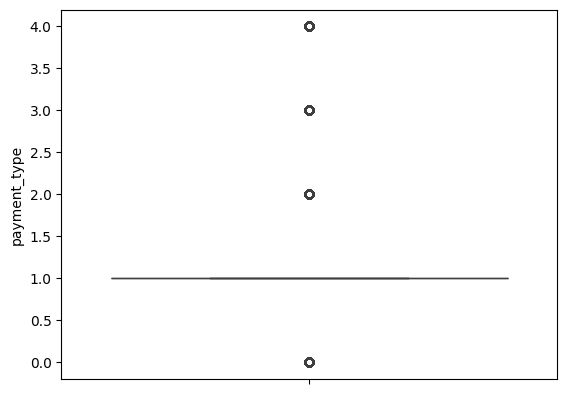

In [81]:
sns.boxplot(df['payment_type'])

<Axes: xlabel='payment_type', ylabel='Count'>

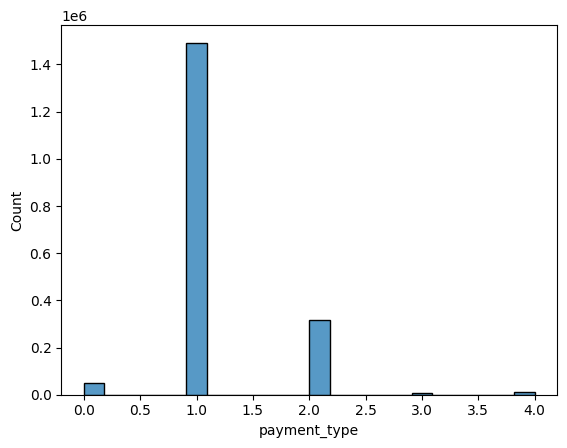

In [82]:
sns.histplot(df['payment_type'])

In [61]:
df['payment_type']=df['payment_type'].apply(lambda x: 1 if x == 0 else x)

In [62]:
df['payment_type'].value_counts()

,count
payment_type,
1,1542277
2,316056
4,13637
3,8837


<Axes: ylabel='payment_type'>

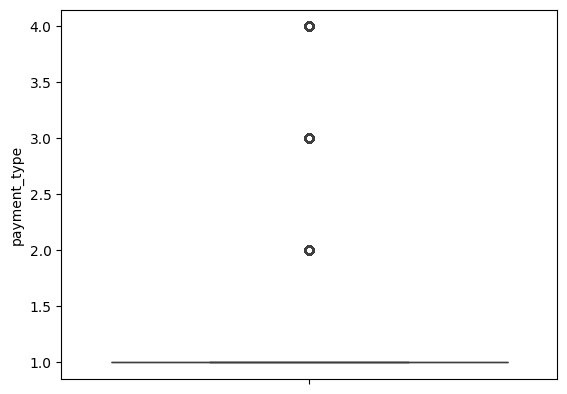

In [85]:
sns.boxplot(df['payment_type'])

<Axes: xlabel='payment_type', ylabel='Count'>

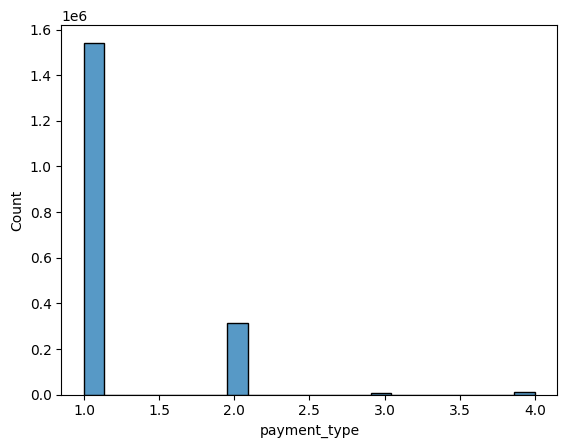

In [86]:
sns.histplot(df['payment_type'])

In [87]:
df.trip_distance.describe()

,trip_distance
count,1.880807e+06
mean,3.890280e+00
std,1.299434e+02
min,0.000000e+00
25%,1.070000e+00
50%,1.800000e+00
75%,3.430000e+00
max,1.263605e+05


<Axes: ylabel='trip_distance'>

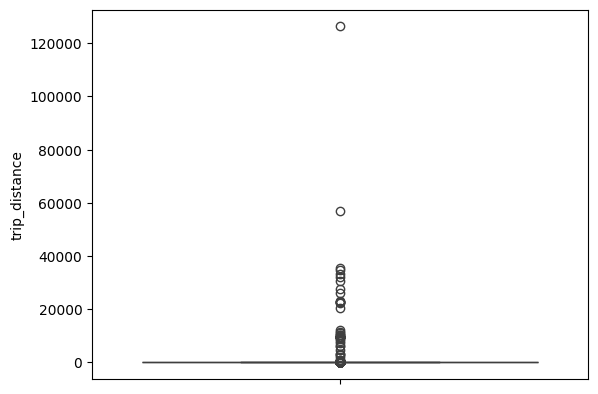

In [88]:
sns.boxplot(df['trip_distance'])

In [89]:
df[(df['trip_distance']>0) & (df['total_amount']==0)].value_counts().sum()

np.int64(140)

In [90]:
df[(df['trip_distance']>0) & (df['total_amount']==0)].value_counts()

VendorID  tpep_pickup_datetime  tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  Airport_Fee_Combined
1         2023-01-13 08:00:04   2023-01-13 08:01:39    1.0              0.80           1.0         145           145           2             0.0          0.0    0.0      0.0         0.0           0.0                    0.0           0.0                   0.00                    1
          2023-01-14 14:47:05   2023-01-14 15:34:07    1.0              20.80          2.0         132           239           4             0.0          0.0    0.0      0.0         0.0           0.0                    0.0           0.0                   0.00                    1
          2023-01-17 15:23:25   2023-01-17 15:46:25    1.0              1.80           1.0         162           236           1             0.0          0.0    0.0      0.0         0.0           0.0                    0.0           0.0                   0.00                    1
          2023-01-18 05:58:06   2023-01-18 06:23:02    1.0              2.80           1.0         79            229           4             0.0          0.0    0.0      0.0         0.0           0.0                    0.0           0.0                   0.00                    1
          2023-01-24 16:15:41   2023-01-24 16:23:42    1.0              3.50           1.0         132           10            4             0.0          0.0    0.0      0.0         0.0           0.0                    0.0           0.0                   0.00                    1
                                                                                                                                                                                                                                                                                      ..
2         2023-11-30 17:25:50   2023-11-30 18:02:33    1.0              1.72           1.0         236           161           2             0.0          0.0    0.5      0.0         0.0           1.0                    0.0           2.5                   0.00                    1
          2023-12-12 06:57:09   2023-12-12 07:16:37    1.0              3.30           1.0         164           239           2             0.0          0.0    0.5      0.0         0.0           1.0                    0.0           2.5                   0.00                    1
          2023-12-17 08:10:57   2023-12-17 08:28:46    1.0              11.27          1.0         132           70            2             0.0          0.0    0.5      0.0         0.0           1.0                    0.0           0.0                   1.75                    1
          2023-12-19 15:33:14   2023-12-19 16:05:27    2.0              5.83           1.0         186           87            2             0.0          0.0    0.5      0.0         0.0           1.0                    0.0           2.5                   0.00                    1
          2023-12-29 17:32:20   2023-12-29 17:33:49    1.0              0.02           1.0         161           161           2             0.0          0.0    0.5      0.0         0.0           1.0                    0.0           2.5                   0.00                    1
Name: count, Length: 140, dtype: int64

In [63]:
df.drop((df[(df['trip_distance']>0) & (df['total_amount']==0)]).index, inplace=True)

In [64]:
df[(df['trip_distance']>0) & (df['total_amount']==0)].value_counts()

,,,,,,,,,,,,,,,,,,count
VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined,


In [65]:
Trip_df=df[(df['trip_distance']>300)]
Trip_df.groupby('trip_distance')['total_amount'].value_counts()



,,count
trip_distance,total_amount,
403.66,30.00,1
721.26,11.40,1
969.10,27.00,1
2003.03,25.87,1
2942.93,34.42,1
3253.99,27.05,1
3317.68,103.91,1
4547.48,44.52,1
6262.99,11.28,1


In [66]:
df[df['trip_distance']>300].value_counts().sum()

np.int64(46)

In [67]:
df.drop((df[df['trip_distance']>300]).index, inplace=True)

In [68]:
df['trip_distance'].describe()

,trip_distance
count,1.880621e+06
mean,3.472725e+00
std,4.541512e+00
min,0.000000e+00
25%,1.070000e+00
50%,1.800000e+00
75%,3.430000e+00
max,2.048600e+02


<Axes: ylabel='trip_distance'>

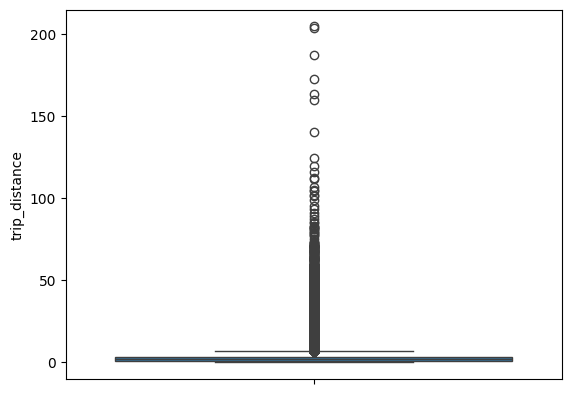

In [99]:
sns.boxplot(df['trip_distance'])

In [100]:
df['tip_amount'].describe()

,tip_amount
count,1.880621e+06
mean,3.573494e+00
std,4.057107e+00
min,0.000000e+00
25%,1.000000e+00
50%,2.860000e+00
75%,4.450000e+00
max,2.230800e+02


In [101]:
df[(df['trip_distance']==0) & (df['total_amount']!=0)].value_counts().sum()

np.int64(21907)

In [102]:
df[(df['trip_distance']==0) & (df['total_amount']!=0)].value_counts()

VendorID  tpep_pickup_datetime  tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  Airport_Fee_Combined
2         2023-12-31 23:15:38   2023-12-31 23:18:16    1.0              0.0            1.0         170           79            1             4.4          1.0    0.5      1.88        0.00          1.0                    11.28         2.5                   0.0                     1
1         2023-01-01 00:45:06   2023-01-01 00:54:06    1.0              0.0            1.0         48            48            2             8.6          3.5    0.5      0.00        0.00          1.0                    13.60         2.5                   0.0                     1
          2023-01-01 01:26:38   2023-01-01 01:27:12    1.0              0.0            5.0         229           229           1             5.0          0.0    0.0      0.00        0.00          1.0                    6.00          0.0                   0.0                     1
          2023-01-01 01:44:13   2023-01-01 01:44:30    1.0              0.0            5.0         137           137           3             20.0         0.0    0.0      0.00        0.00          1.0                    21.00         0.0                   0.0                     1
          2023-01-01 01:51:10   2023-01-01 02:19:45    1.0              0.0            6.0         74            77            1             41.2         0.0    0.5      0.00        6.55          1.0                    49.25         0.0                   0.0                     1
                                                                                                                                                                                                                                                                                      ..
          2023-01-02 06:33:58   2023-01-02 06:56:56    1.0              0.0            1.0         14            203           1             49.2         0.0    0.5      0.00        0.00          1.0                    50.70         0.0                   0.0                     1
          2023-01-02 09:55:34   2023-01-02 10:10:39    1.0              0.0            6.0         16            215           1             24.0         0.0    0.5      0.00        0.00          1.0                    25.50         0.0                   0.0                     1
          2023-01-02 12:48:02   2023-01-02 13:30:22    1.0              0.0            6.0         159           51            1             29.0         0.0    0.5      0.00        0.00          1.0                    30.50         0.0                   0.0                     1
          2023-01-02 13:07:47   2023-01-02 13:10:17    1.0              0.0            1.0         44            44            1             15.2         0.0    0.5      0.00        0.00          1.0                    16.70         0.0                   0.0                     1
          2023-01-02 13:21:18   2023-01-02 13:50:01    1.0              0.0            1.0         113           169           1             37.5         0.0    0.5      0.00        0.00          1.0                    39.00         0.0                   0.0                     1
Name: count, Length: 21907, dtype: int64

In [69]:
df.drop((df[(df['trip_distance']==0) & (df['total_amount']!=0)]).index, inplace=True)

In [104]:
df[(df['trip_distance']==0) & (df['total_amount']==0)].value_counts().sum()

np.int64(232)

In [105]:
df[(df['trip_distance']==0)].value_counts().sum()

np.int64(232)

In [70]:
df.drop((df[(df['trip_distance']==0) & (df['total_amount']==0)]).index, inplace=True)

In [107]:
df[(df['trip_distance']==0)].value_counts()

,,,,,,,,,,,,,,,,,,count
VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined,


In [108]:
df[(df['trip_distance']==0) & (df['total_amount']==0)].value_counts().sum()

np.int64(0)

In [71]:
df['trip_distance'].value_counts().sum()

np.int64(1858482)

In [110]:
df[(df['trip_distance']!=0) & (df['total_amount']==0)].value_counts().sum()

np.int64(0)

In [111]:
df[(df['trip_distance']!=0) & (df['total_amount']==0)].value_counts()

,,,,,,,,,,,,,,,,,,count
VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined,


<Axes: ylabel='trip_distance'>

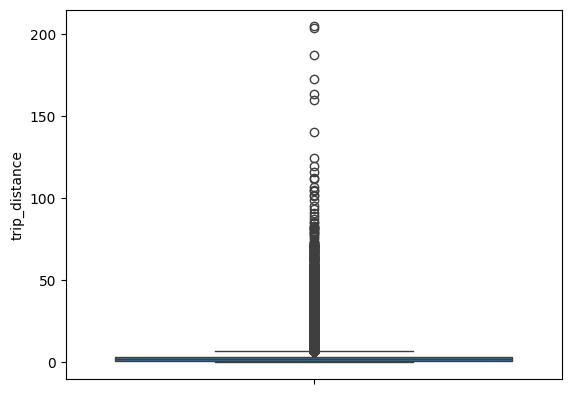

In [112]:
sns.boxplot(df['trip_distance'])

<Axes: ylabel='tip_amount'>

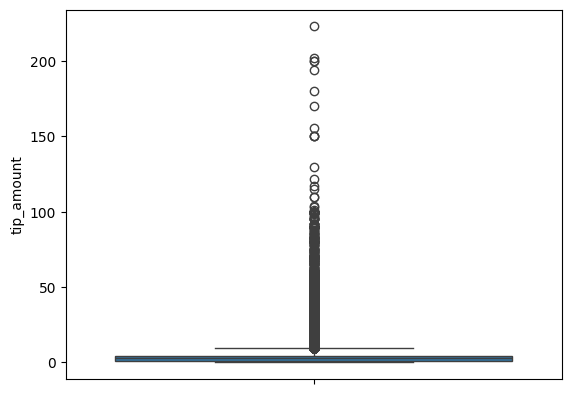

In [113]:
sns.boxplot(df['tip_amount'])

In [114]:
df['tip_amount'].describe()

,tip_amount
count,1.858482e+06
mean,3.578996e+00
std,3.994481e+00
min,0.000000e+00
25%,1.000000e+00
50%,2.880000e+00
75%,4.480000e+00
max,2.230800e+02


In [115]:
df[(df['tip_amount']>0) & (df['payment_type']!=1)].value_counts().sum()

np.int64(46)

In [116]:
df[(df['tip_amount']>0) & (df['payment_type']!=1)].value_counts()

VendorID  tpep_pickup_datetime  tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  Airport_Fee_Combined
1         2023-01-27 18:56:20   2023-01-27 19:09:48    1.0              2.10           1.0         230           236           2             14.20        5.0    0.5      3.64        0.00          1.0                    24.34         2.5                   0.00                    1
          2023-02-15 14:16:10   2023-02-15 14:22:55    1.0              0.40           1.0         162           161           2             7.90         2.5    0.5      2.35        0.00          1.0                    14.25         2.5                   0.00                    1
          2023-03-10 09:32:21   2023-03-10 09:39:22    1.0              0.70           1.0         48            230           2             7.90         2.5    0.5      2.00        0.00          1.0                    13.90         2.5                   0.00                    1
          2023-04-22 16:23:21   2023-04-22 16:37:00    4.0              4.30           1.0         236           194           2             19.80        2.5    0.5      6.05        6.55          1.0                    36.40         2.5                   0.00                    1
          2023-05-29 21:41:24   2023-05-29 21:52:38    1.0              1.60           1.0         162           50            2             10.70        3.5    0.5      1.73        0.00          1.0                    17.43         2.5                   0.00                    1
          2023-06-22 10:46:08   2023-06-22 11:08:38    2.0              2.30           1.0         142           140           2             20.50        2.5    0.5      1.00        0.00          1.0                    25.50         2.5                   0.00                    1
          2023-06-28 20:04:06   2023-06-28 20:16:34    1.0              2.70           1.0         236           24            2             16.30        3.5    0.5      5.11        0.00          1.0                    26.41         2.5                   0.00                    1
          2023-09-07 17:21:12   2023-09-07 17:36:49    1.0              2.00           1.0         142           236           2             13.50        5.0    0.5      2.72        0.00          1.0                    22.72         2.5                   0.00                    1
          2023-10-06 15:07:34   2023-10-06 15:15:41    1.0              0.80           1.0         163           161           2             8.60         2.5    0.5      3.02        0.00          1.0                    15.62         2.5                   0.00                    1
          2023-11-23 19:57:47   2023-11-23 20:04:36    1.0              0.80           1.0         229           163           2             7.90         3.5    0.5      4.03        0.00          1.0                    16.93         2.5                   0.00                    1
          2023-11-28 13:57:26   2023-11-28 14:02:26    1.0              0.60           1.0         237           161           2             5.80         2.5    0.5      1.95        0.00          1.0                    11.75         2.5                   0.00                    1
          2023-12-19 07:48:12   2023-12-19 07:48:12    4.0              7.00           1.0         162           13            3             8.72         2.5    0.5      7.28        0.00          1.0                    20.00         2.5                   0.00                    1
2         2023-01-13 15:37:34   2023-01-13 16:19:10    1.0              11.08          1.0         138           48            4             52.00        5.0    0.5      4.80        6.55          1.0                    73.60         2.5                   1.25                    1
          2023-01-14 18:33:02   2023-01-14 18:54:13    2.0             

<Axes: ylabel='tip_amount'>

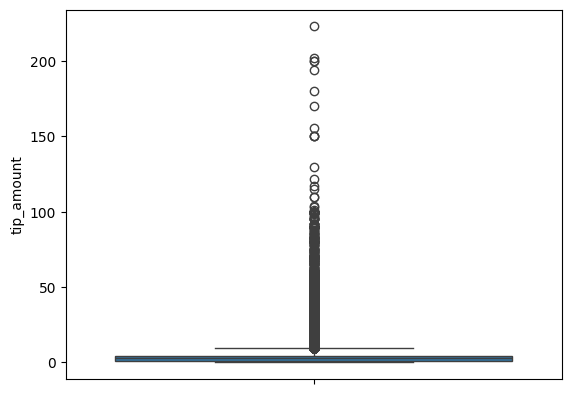

In [117]:
sns.boxplot(df['tip_amount'])

In [118]:
df.payment_type.describe()

,payment_type
count,1.858482e+06
mean,1.193889e+00
std,4.507906e-01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,4.000000e+00


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [72]:
# remove passenger_count > 6
df['passenger_count'].value_counts()

,count
passenger_count,
1.0,1438368
2.0,274608
3.0,68289
4.0,37663
5.0,23755
6.0,15788
8.0,5
9.0,3
7.0,3


In [73]:
df.drop((df[df['passenger_count']>6]).index, inplace=True)

In [74]:
df['passenger_count'].value_counts()

,count
passenger_count,
1.0,1438368
2.0,274608
3.0,68289
4.0,37663
5.0,23755
6.0,15788


In [122]:
df[df['passenger_count']==0].value_counts().sum()

np.int64(0)

In [123]:
df[(df['passenger_count']==0) & (df['trip_distance']>0)].value_counts().sum()

np.int64(0)

In [124]:
df[(df['passenger_count']==0) & (df['trip_distance']<1)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined


In [75]:
df['passenger_count']=df['passenger_count'].apply(lambda x: 1 if x == 0 else x)

<Axes: xlabel='passenger_count', ylabel='Count'>

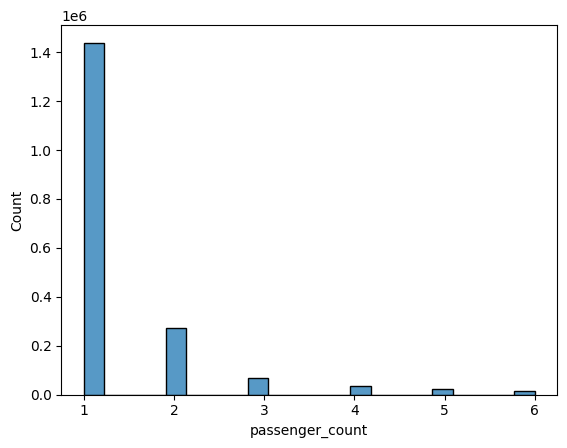

In [126]:
sns.histplot(df['passenger_count'])

In [127]:
df[(df['trip_distance']==0) & (df['fare_amount']>300)].value_counts()

,,,,,,,,,,,,,,,,,,count
VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined,


In [128]:
df[(df['trip_distance']!=0) & (df['fare_amount']!=0) & (df['PULocationID']==df['DOLocationID']) ].value_counts()

VendorID  tpep_pickup_datetime  tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  Airport_Fee_Combined
6         2023-06-21 17:06:11   2023-06-21 18:06:57    1.0              18.05          1.0         265           265           1             67.96        0.0    0.5      0.00        0.0           0.3                    68.76         0.0                   0.0                     1
1         2023-01-01 00:12:59   2023-01-01 00:21:25    1.0              1.00           1.0         237           237           1             8.60         3.5    0.5      4.10        0.0           1.0                    17.70         2.5                   0.0                     1
          2023-01-01 00:13:56   2023-01-01 00:23:05    4.0              0.70           1.0         170           170           1             7.90         3.5    0.5      2.55        0.0           1.0                    15.45         2.5                   0.0                     1
          2023-01-01 00:27:51   2023-01-01 00:35:03    1.0              1.20           1.0         236           236           1             9.30         3.5    0.5      2.00        0.0           1.0                    16.30         2.5                   0.0                     1
          2023-01-01 01:11:27   2023-01-01 01:12:35    5.0              0.30           1.0         263           263           2             3.70         3.5    0.5      0.00        0.0           1.0                    8.70          2.5                   0.0                     1
                                                                                                                                                                                                                                                                                      ..
          2023-01-01 14:56:33   2023-01-01 15:01:28    4.0              0.80           1.0         162           162           2             6.50         2.5    0.5      0.00        0.0           1.0                    10.50         2.5                   0.0                     1
          2023-01-01 15:21:52   2023-01-01 15:24:51    1.0              0.40           1.0         162           162           1             5.10         2.5    0.5      1.00        0.0           1.0                    10.10         2.5                   0.0                     1
          2023-01-01 15:49:47   2023-01-01 15:57:32    1.0              0.20           1.0         162           162           1             7.90         2.5    0.5      2.35        0.0           1.0                    14.25         2.5                   0.0                     1
          2023-01-01 16:04:35   2023-01-01 16:07:09    1.0              0.60           1.0         238           238           1             5.10         2.5    0.5      2.25        0.0           1.0                    11.35         2.5                   0.0                     1
          2023-01-01 16:25:13   2023-01-01 16:37:13    2.0              0.40           1.0         48            48            2             11.40        2.5    0.5      0.00        0.0           1.0                    15.40         2.5                   0.0                     1
Name: count, Length: 85519, dtype: int64

In [129]:
df[df['trip_distance']>250].value_counts().sum()

np.int64(0)

In [130]:
df['payment_type'].value_counts()

,count
payment_type,
1,1529474
2,309909
4,12254
3,6834


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1858471 entries, 0 to 1896399
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  Airport_Fee_Combined   float64       
dtypes: datetime64[us](2), float

In [ ]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [132]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_Fee_Combined']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

In [76]:
df.select_dtypes(include=['object','category']).columns.tolist()

[]

In [77]:
df.select_dtypes(include=['number']).columns.tolist()

['VendorID',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_Fee_Combined']

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1858471 entries, 0 to 1896399
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  Airport_Fee_Combined   float64       
dtypes: datetime64[us](2), float

In [78]:
# Find and show the hourly trends in taxi pickups
hour_data=df.copy()
hour_data['pickup_hour']=hour_data['tpep_pickup_datetime'].dt.hour
trend_hour=hour_data['pickup_hour'].value_counts()

In [79]:
hour_data['pickup_hour'].value_counts()

,count
pickup_hour,
18,131427
17,125359
19,117608
15,115363
16,115311
14,112436
13,104877
20,104794
21,104565


<Axes: xlabel='pickup_hour', ylabel='count'>

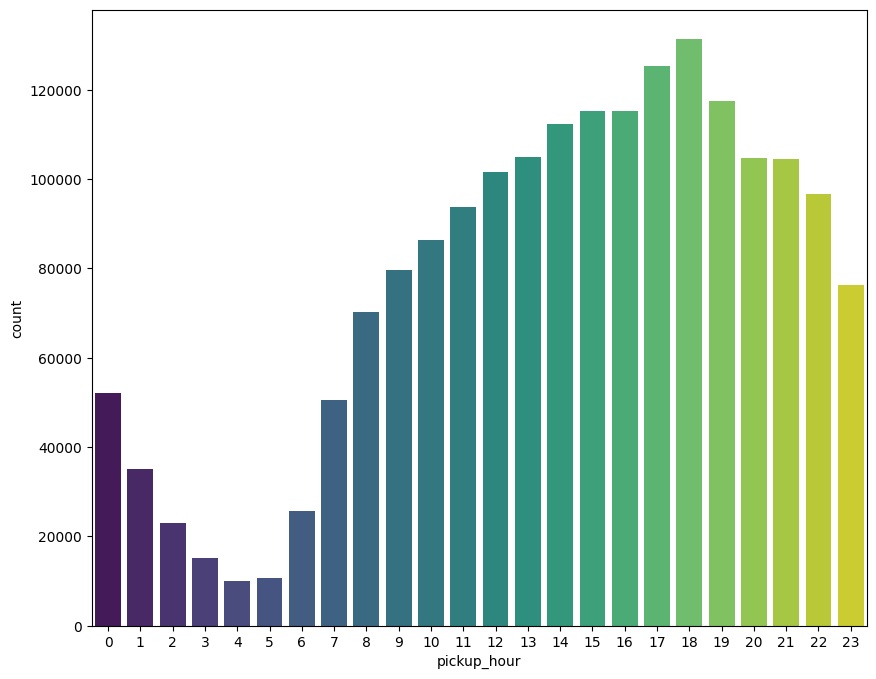

In [138]:
plt.figure(figsize=(10, 8))
sns.barplot(trend_hour,palette="viridis")

In [80]:
# Find and show the daily trends in taxi pickups (days of the week)
day_data=df.copy()
day_data['pickup_day']=day_data['tpep_pickup_datetime'].dt.day_name()

In [81]:
trend_data=day_data['pickup_day'].value_counts()

In [82]:
trend_data

,count
pickup_day,
Thursday,291682
Wednesday,285274
Friday,276279
Saturday,270392
Tuesday,269179
Sunday,234059
Monday,231606


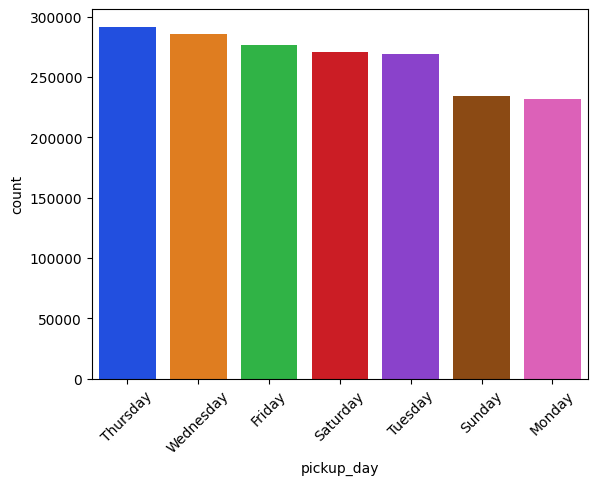

In [143]:
sns.barplot(trend_data,palette='bright')
plt.xticks(rotation=45)
plt.show()

In [83]:
# Show the monthly trends in pickups
month_data=df.copy()
month_data['pickup_month']=month_data['tpep_pickup_datetime'].dt.month_name()

In [84]:
trend_month=month_data['pickup_month'].value_counts()
trend_month

,count
pickup_month,
May,171789
October,168315
March,166257
December,163131
June,161521
April,160954
November,160150
January,149807
February,142406


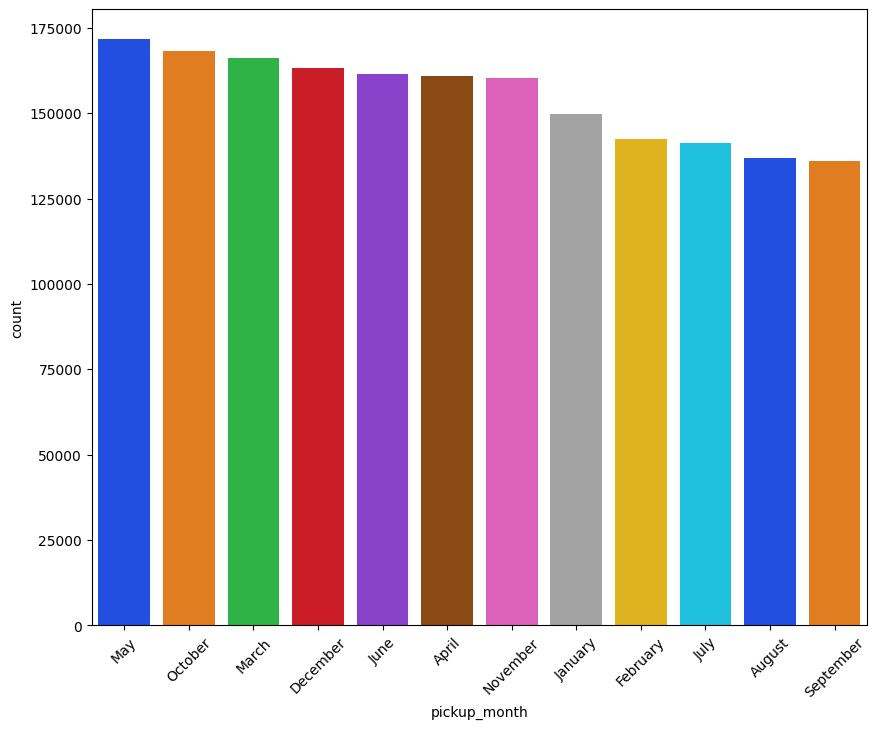

In [146]:
plt.figure(figsize=(10, 8))
sns.barplot(trend_month,palette="bright")
plt.xticks(rotation=45)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [147]:
# Analyse the above parameters
df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].describe()

,fare_amount,tip_amount,total_amount,trip_distance
count,1.858471e+06,1.858471e+06,1.858471e+06,1.858471e+06
mean,1.980539e+01,3.578945e+00,2.893153e+01,3.514053e+00
std,1.065114e+02,3.994390e+00,1.073833e+02,4.552460e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e-02
25%,9.300000e+00,1.000000e+00,1.600000e+01,1.100000e+00
50%,1.350000e+01,2.880000e+00,2.100000e+01,1.810000e+00
75%,2.190000e+01,4.480000e+00,3.080000e+01,3.480000e+00
max,1.431635e+05,2.230800e+02,1.431675e+05,2.048600e+02


In [148]:
df[(df['fare_amount']==0)].value_counts().sum()

np.int64(186)

In [85]:
df.drop((df[(df['fare_amount']==0)].index), inplace=True)

In [86]:
df[(df['fare_amount']==0)].value_counts().sum()

np.int64(0)

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [3]:
# Create a df with non zero entries for the selected parameters.
#df_non_zero=df.copy()
df_non_zero=pd.read_parquet('/content/sample_data/Trip_data/non_zero_data.parquet')
#df.to_parquet('/content/sample_data/Trip_data/non_zero_data.parquet')

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [7]:
# Group data by month and analyse monthly revenue
df_non_zero['pickup_month']=df_non_zero['tpep_pickup_datetime'].dt.month_name()

In [8]:
df_non_zero.groupby('pickup_month')['total_amount'].sum()

,total_amount
pickup_month,
April,4604645.16
August,3991347.87
December,4746247.34
February,3878216.42
January,4090882.58
July,4098841.71
June,4730626.72
March,4679344.99
May,5032472.28


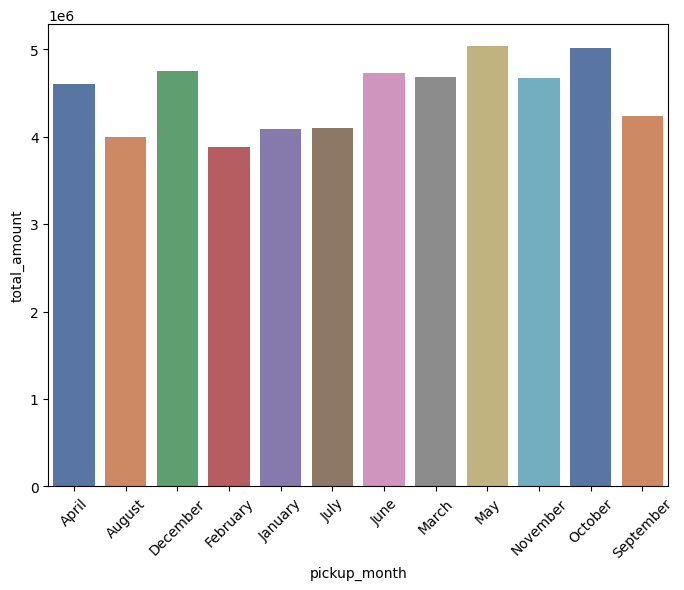

In [91]:
data=df_non_zero.groupby('pickup_month')['total_amount'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(data, palette='deep')
plt.xticks(rotation=45)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [92]:
# Calculate proportion of each quarter
df_non_zero['pickup_Qtr']=df_non_zero['tpep_pickup_datetime'].dt.quarter


In [93]:
df_non_zero.groupby('pickup_Qtr')['total_amount'].sum()

,total_amount
pickup_Qtr,
1,12648443.99
2,14367744.16
3,12325643.16
4,14425248.46


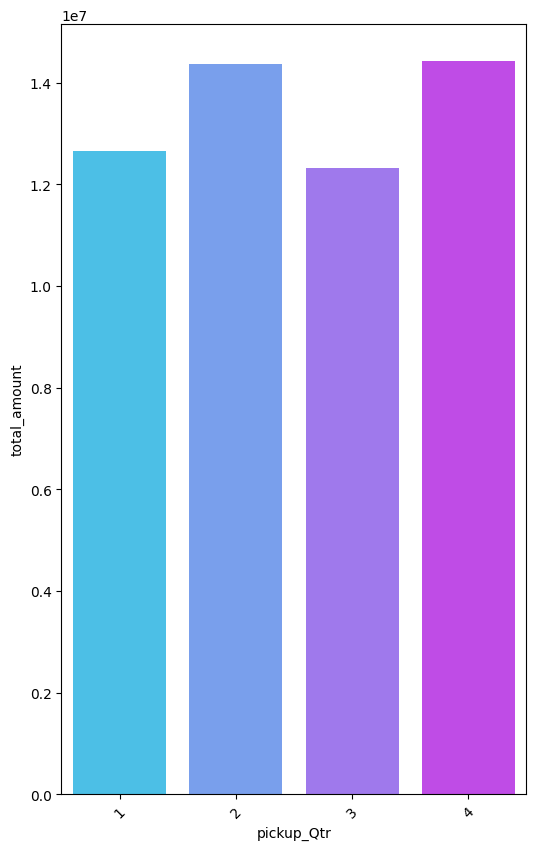

In [157]:
plt.figure(figsize=(6, 10))
sns.barplot(df_non_zero.groupby('pickup_Qtr')['total_amount'].sum(), palette='cool')
plt.xticks(rotation=45)
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [94]:
df_non_zero[df_non_zero['trip_distance']==0].value_counts().sum()

np.int64(0)

In [12]:

c_matrix={'trip_distance':df_non_zero['trip_distance'], 'fare_amount':df_non_zero['fare_amount']}
df_distance=pd.DataFrame(c_matrix)
df_distance.head()

,trip_distance,fare_amount
0,2.53,14.2
1,0.90,8.6
2,5.59,27.5
3,15.50,61.1
4,17.15,70.0


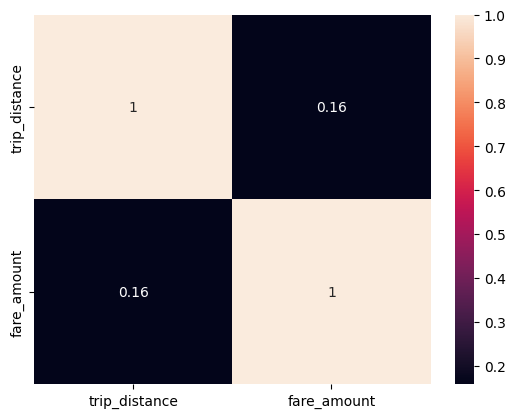

In [13]:
sns.heatmap(df_distance.corr(), annot=True)
plt.show()

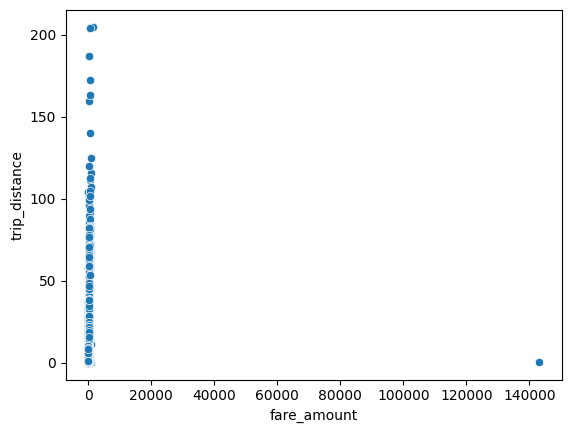

In [160]:
# Show how trip fare is affected by distance
sns.scatterplot(data=df_non_zero, x='fare_amount', y='trip_distance', palette='deep')
plt.show()


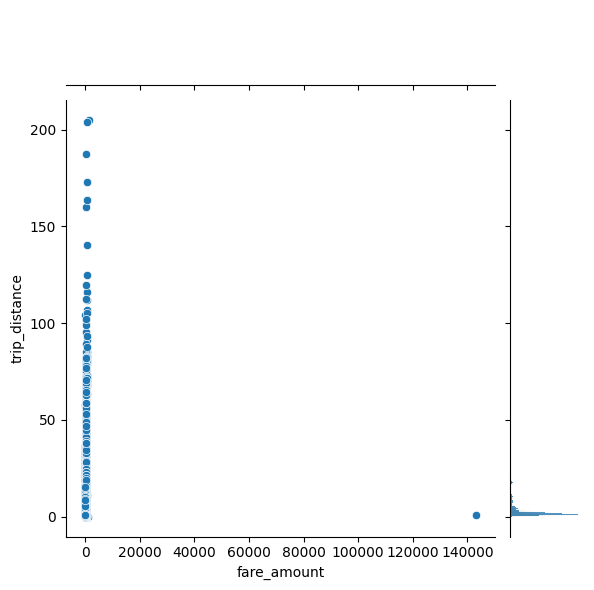

In [161]:
sns.jointplot(data=df_non_zero, x='fare_amount', y='trip_distance', palette='deep')
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [96]:
# Show relationship between fare and trip duration

trip_duration=df_non_zero['tpep_dropoff_datetime']-df_non_zero['tpep_pickup_datetime']
trip_duration=trip_duration.dt.total_seconds()
c_matrix={'trip_duration':trip_duration, 'fare_amount':df_non_zero['fare_amount']}
df_duration=pd.DataFrame(c_matrix)
df_duration.head()

,trip_duration,fare_amount
0,783.0,14.2
1,436.0,8.6
2,1361.0,27.5
3,1999.0,61.1
4,2189.0,70.0


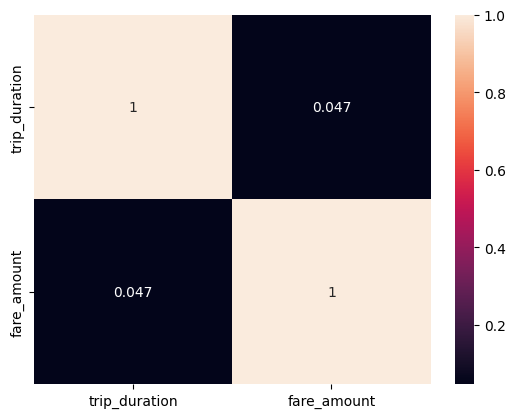

In [97]:
sns.heatmap(df_duration.corr(), annot=True)
plt.show()

In [98]:
# Show relationship between fare and number of passengers
c_matrix={'Fare':df_non_zero['fare_amount'], 'Passengers':df_non_zero['passenger_count']}
df_relation=pd.DataFrame(c_matrix)
df_relation.head()

,Fare,Passengers
0,14.2,1.0
1,8.6,1.0
2,27.5,1.0
3,61.1,2.0
4,70.0,1.0


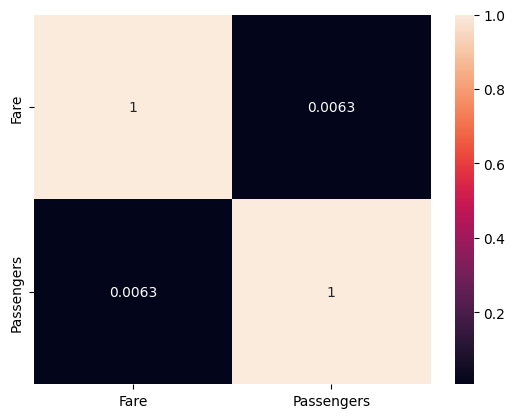

In [99]:
sns.heatmap(df_relation.corr(), annot=True)
plt.show()

In [100]:
# Show relationship between tip and trip distance
c_matrix={'Tip':df_non_zero['tip_amount'], 'Distance':df_non_zero['trip_distance']}
df_relation=pd.DataFrame(c_matrix)
df_relation.head()

,Tip,Distance
0,3.84,2.53
1,2.70,0.90
2,6.50,5.59
3,13.05,15.50
4,0.00,17.15


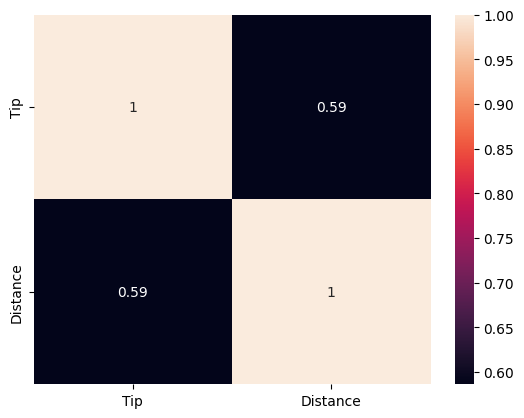

In [101]:
sns.heatmap(df_relation.corr(), annot=True)
plt.show()

In [14]:
c_matrix={'Fare':df_non_zero['fare_amount'], 'Tips':df_non_zero['tip_amount']}
df_tip_fare=pd.DataFrame(c_matrix)
df_tip_fare.head()

,Fare,Tips
0,14.2,3.84
1,8.6,2.70
2,27.5,6.50
3,61.1,13.05
4,70.0,0.00


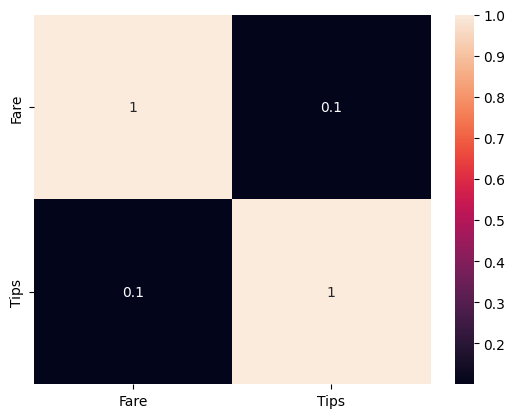

In [15]:
sns.heatmap(df_tip_fare.corr(), annot=True)
plt.show()

In [17]:
trip_duration=df_non_zero['tpep_dropoff_datetime']-df_non_zero['tpep_pickup_datetime']
trip_duration=trip_duration.dt.total_seconds()
c_matrix={'trip_duration':trip_duration, 'Passenger':df_non_zero['passenger_count']}
df_trips_passenger=pd.DataFrame(c_matrix)
df_trips_passenger.head()

,trip_duration,Passenger
0,783.0,1.0
1,436.0,1.0
2,1361.0,1.0
3,1999.0,2.0
4,2189.0,1.0


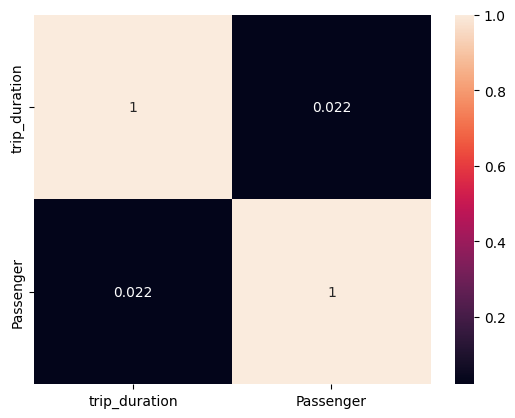

In [18]:
sns.heatmap(df_trips_passenger.corr(), annot=True)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [102]:
# Analyse the distribution of different payment types (payment_type).
payment=df_non_zero['payment_type'].value_counts()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



<Axes: xlabel='payment_type', ylabel='count'>

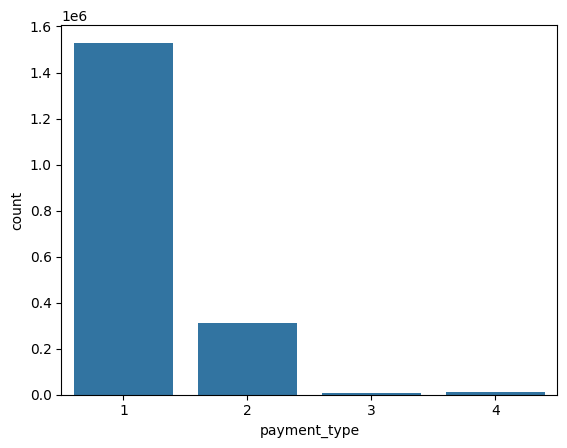

In [103]:
sns.barplot(payment)

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [5]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/content/sample_data/gpb_files/taxi_zones.shp')# read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [24]:
# print(zones.info())
print(zones.info())
# zones.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

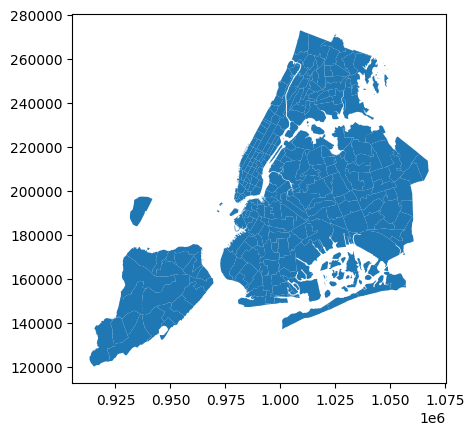

In [11]:
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [6]:
# Merge zones and trip records using locationID and PULocationID
zone_trips = zones.merge(df_non_zero, left_on='LocationID', right_on='PULocationID', how='inner')

In [178]:
zone_trips.head(3)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined,pickup_month,pickup_Qtr
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2,2023-08-01 13:26:32,2023-08-01 13:26:43,...,0.0,0.0,5.0,0.0,1.0,96.0,0.0,0.0,August,3
1,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1,2023-08-15 06:59:59,2023-08-15 07:05:46,...,0.0,0.5,2.3,0.0,1.0,13.8,0.0,0.0,August,3
2,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2,2023-05-06 17:21:00,2023-05-06 17:21:04,...,0.0,0.0,4.2,0.0,1.0,25.2,0.0,0.0,May,2


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [14]:
# Group data by location and calculate the number of trips
zone_trips.groupby('PULocationID')['PULocationID'].count().sort_values(ascending=False).head()


,PULocationID
PULocationID,
132,95145
237,87913
161,86622
236,78945
162,66092


In [7]:
zone_trips.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2,2023-08-01 13:26:32,2023-08-01 13:26:43,...,1,90.0,0.0,0.0,5.0,0.0,1.0,96.0,0.0,0.0
1,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1,2023-08-15 06:59:59,2023-08-15 07:05:46,...,1,10.0,0.0,0.5,2.3,0.0,1.0,13.8,0.0,0.0
2,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2,2023-05-06 17:21:00,2023-05-06 17:21:04,...,1,20.0,0.0,0.0,4.2,0.0,1.0,25.2,0.0,0.0
3,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2,2023-05-13 06:36:35,2023-05-13 06:36:42,...,1,140.0,0.0,0.0,28.2,0.0,1.0,169.2,0.0,0.0
4,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1,2023-05-13 07:44:32,2023-05-13 07:44:55,...,1,79.0,0.0,0.0,10.0,0.0,1.0,90.0,0.0,0.0


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [31]:
# Merge trip counts back to the zones GeoDataFrame
zones['trip_count'] = zone_trips.groupby('PULocationID')['PULocationID'].count()



The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

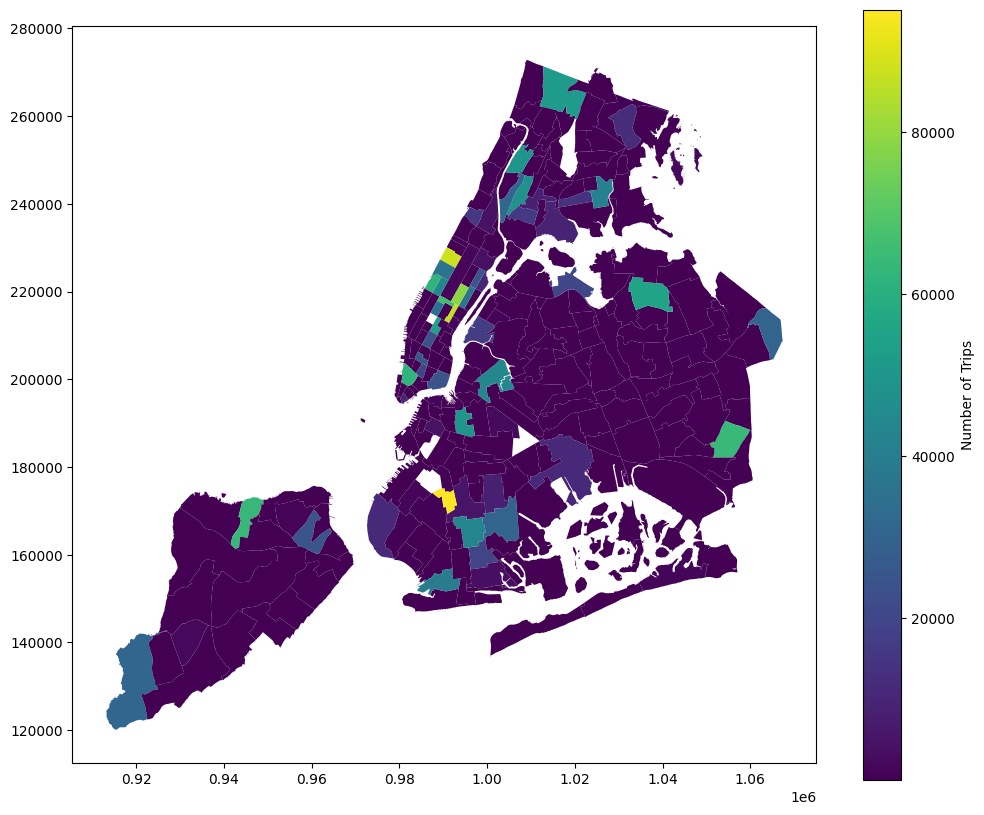

In [29]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
column = 'trip_count'
legend = True
legend_kwds = {'label': "Number of Trips", 'orientation': "vertical"}
# Plot the map and display it
zones.plot(column=column, ax=ax, legend=legend, legend_kwds=legend_kwds)
plt.show()

In [30]:
# can you try displaying the zones DF sorted by the number of trips?
zones.sort_values(by='trip_count', ascending=False)


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
132,133,0.065135,0.000157,Kensington,133,Brooklyn,"POLYGON ((990302.048 175188.312, 990417.95 174...",95145.0
237,238,0.060109,0.000185,Upper West Side North,238,Manhattan,"POLYGON ((992877.88 225627.534, 992741.735 225...",87913.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",86622.0
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",78945.0
162,163,0.034177,0.000041,Midtown North,163,Manhattan,"POLYGON ((989412.663 219020.943, 990045.841 21...",66092.0
...,...,...,...,...,...,...,...,...
105,106,0.049211,0.000114,Gowanus,106,Brooklyn,"POLYGON ((988104.225 187386.493, 988649.315 18...",NaN
109,110,0.103946,0.000526,Great Kills Park,110,Staten Island,"POLYGON ((951420.092 139894.411, 951856.209 13...",NaN
110,111,0.059931,0.000209,Green-Wood Cemetery,111,Brooklyn,"POLYGON ((985590.381 179611.82, 986202.162 179...",NaN
176,177,0.071581,0.000199,Ocean Hill,177,Brooklyn,"POLYGON ((1011190.693 186535.075, 1011322.897 ...",NaN


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [46]:
# Find routes which have the slowest speeds at different times of the day
speed_data=df_non_zero.copy()
speed_data['tpep_pickup_datetime']=pd.to_datetime(speed_data['tpep_pickup_datetime'])
speed_data['pickup_hour']=speed_data['tpep_pickup_datetime'].dt.hour
speed_data['tpep_dropoff_datetime']=pd.to_datetime(speed_data['tpep_dropoff_datetime'])
speed_data['trip_distance']=speed_data['trip_distance'].astype(float)
speed_data['trip_duration']=speed_data['tpep_dropoff_datetime']-speed_data['tpep_pickup_datetime']
speed_data['trip_duration']=speed_data['trip_duration'].dt.total_seconds()
distance_data=speed_data.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])['trip_distance'].sum()
speed_data=speed_data.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])['trip_duration'].mean()
speed_for_hour=distance_data/speed_data
speed_for_hour

speed_for_hour.sort_values(ascending=True).head(10)

PULocationID  DOLocationID  pickup_hour
265           169           15            -6.513333
              9             11            -5.310000
              86            22            -3.396667
              9             22            -3.360000
              140           10            -3.333333
              41            17            -2.954286
              137           6             -2.470000
              244           7             -1.706667
              69            13            -1.455000
              176           14            -1.370000
dtype: float64

In [47]:
speed_for_hour.sort_values(ascending=False).head(10)

PULocationID  DOLocationID  pickup_hour
265           160           12                   inf
108           264           15                   inf
265           66            14                   inf
80            80            8                    inf
265           188           19             12.020000
              76            0               6.385000
              25            16              6.250000
              216           6               3.830000
217           217           15              3.350000
264           264           21              3.298549
dtype: float64

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [40]:
# Visualise the number of trips per hour and find the busiest hour
df_non_zero['pickup_hour']=df_non_zero['tpep_pickup_datetime'].dt.hour
df_non_zero.groupby('pickup_hour')['pickup_hour'].count()

,pickup_hour
pickup_hour,
0,52168
1,34985
2,22930
3,15055
4,10005
5,10656
6,25576
7,50567
8,70259


In [50]:
df_non_zero['pickup_hour']=df_non_zero['tpep_pickup_datetime'].dt.hour
df_non_zero.groupby('pickup_hour')['pickup_hour'].count()
df_non_zero.groupby('pickup_hour')['pickup_hour'].count().sort_values(ascending=False)

,pickup_hour
pickup_hour,
18,131416
17,125354
19,117593
15,115349
16,115301
14,112426
13,104869
20,104782
21,104561


In [31]:
df_non_zero['pickup_hour']=df_non_zero['tpep_pickup_datetime'].dt.hour
df_non_zero.groupby('pickup_hour')['pickup_hour'].count()
df_non_zero.groupby('pickup_hour')['pickup_hour'].count().sort_values(ascending=True)

,pickup_hour
pickup_hour,
4,10005
5,10656
3,15055
2,22930
6,25576
1,34985
7,50567
0,52168
8,70259


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [48]:
# Scale up the number of trips
sampling_ratio=0.01
# Fill in the value of your sampling fraction and use that to scale up the numbers
sampling_fraction = 0.01
scaled_trips = df_non_zero.groupby('pickup_hour')['pickup_hour'].count() * sampling_fraction
scaled_trips.sort_values(ascending=False).head(5)



,pickup_hour
pickup_hour,
18,1314.16
17,1253.54
19,1175.93
15,1153.49
16,1153.01


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [27]:
# Compare traffic trends for the week days and weekends
traffic_data=df_non_zero.copy()
traffic_data['pickup_day']=traffic_data['tpep_pickup_datetime'].dt.day_name()
traffic_data.groupby('pickup_day')['pickup_day'].count()

,pickup_day
pickup_day,
Friday,276254
Monday,231573
Saturday,270367
Sunday,234029
Thursday,291653
Tuesday,269157
Wednesday,285252


In [28]:
traffic_trend=traffic_data.groupby('pickup_day')['pickup_day'].count()

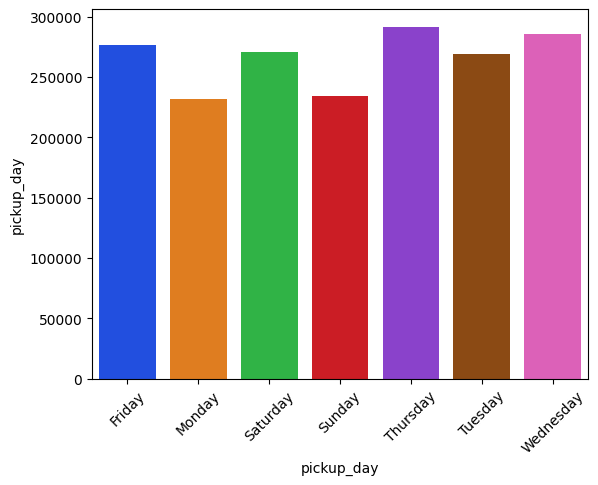

In [29]:
sns.barplot(traffic_trend, palette='bright')
plt.xticks(rotation=45)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [51]:
# Find top 10 pickup and dropoff zones
top_pickups=df_non_zero.groupby('PULocationID')['PULocationID'].count()
top_dropoffs=df_non_zero.groupby('DOLocationID')['DOLocationID'].count()
top_pickups.sort_values(ascending=False).head(10), top_dropoffs.sort_values(ascending=False).head(10)

(PULocationID
 132    95145
 237    87913
 161    86622
 236    78945
 162    66092
 138    63939
 186    63663
 142    61871
 230    61747
 170    55140
 Name: PULocationID, dtype: int64,
 DOLocationID
 236    82667
 237    78673
 161    72842
 230    57056
 170    55000
 162    53008
 142    52409
 239    52300
 141    49315
 68     47129
 Name: DOLocationID, dtype: int64)

In [123]:
top_dropoffs=df_non_zero.groupby('DOLocationID')['DOLocationID'].count()
top_dropoffs.sort_values(ascending=False).head(10)

,DOLocationID
DOLocationID,
236,82667
237,78673
161,72842
230,57056
170,55000
162,53008
142,52409
239,52300
141,49315


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [124]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
top_pickups=df_non_zero.groupby('PULocationID')['PULocationID'].count()
top_dropoffs=df_non_zero.groupby('DOLocationID')['DOLocationID'].count()
ratio=top_pickups/top_dropoffs
ratio.sort_values(ascending=False).head(10)


,0
70,9.234043
132,4.518450
138,2.656819
186,1.568016
114,1.377754
43,1.371073
249,1.331720
162,1.246831
100,1.189371
161,1.189177


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [125]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours=df_non_zero.copy()
night_hours['pickup_hour']=night_hours['tpep_pickup_datetime'].dt.hour
night_hours=night_hours[(night_hours['pickup_hour']>=23) | (night_hours['pickup_hour']<=5)]
night_hours.groupby('PULocationID')['PULocationID'].count().sort_values(ascending=False).head(10)


,PULocationID
PULocationID,
79,16014
132,14365
249,12815
48,10619
148,9954
114,8977
230,8315
186,7011
164,6294


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [52]:
# Filter for night hours (11 PM to 5 AM)
revenue_night=df_non_zero.copy()
revenue_night['pickup_hour']=revenue_night['tpep_pickup_datetime'].dt.hour
revenue_night=revenue_night[(revenue_night['pickup_hour']>=23) | (revenue_night['pickup_hour']<=5)]
revenue_night['total_amount']=revenue_night['total_amount'].astype(float)
revenue_night.groupby('pickup_hour')['total_amount'].sum()

revenue_day=df_non_zero.copy()
revenue_day['pickup_hour']=revenue_day['tpep_pickup_datetime'].dt.hour
revenue_day=revenue_day[(revenue_day['pickup_hour']>=6) & (revenue_day['pickup_hour']<=22)]
revenue_night.groupby('pickup_hour')['total_amount'].sum(), revenue_day.groupby('pickup_hour')['total_amount'].sum()


(pickup_hour
 0     1525308.55
 1      934002.12
 2      579227.04
 3      401235.16
 4      338962.36
 5      414691.52
 23    2333742.63
 Name: total_amount, dtype: float64,
 pickup_hour
 6      818927.43
 7     1394149.89
 8     1876885.27
 9     2149380.41
 10    2484822.69
 11    2564670.46
 12    2835159.99
 13    3018251.14
 14    3373050.39
 15    3449209.77
 16    3674154.64
 17    3773537.95
 18    3738778.17
 19    3346750.40
 20    2954553.73
 21    2964683.66
 22    2822944.40
 Name: total_amount, dtype: float64)

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [128]:
# Analyse the fare per mile per passenger for different passenger counts
passenger_data=df_non_zero.copy()
passenger_data['total_amount']=passenger_data['total_amount'].astype(float)
passenger_data['trip_distance']=passenger_data['trip_distance'].astype(float)
passenger_data=passenger_data[passenger_data['passenger_count']!=0]
passenger_data.groupby('passenger_count')['total_amount'].sum()/passenger_data.groupby('passenger_count')['trip_distance'].sum()


,0
passenger_count,
1.0,8.373170
2.0,7.754985
3.0,7.946323
4.0,7.777822
5.0,8.344017
6.0,8.359243


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [131]:
# Compare the average fare per mile for different days and for different times of the day
average_fare=df_non_zero.copy()
average_fare['total_amount']=average_fare['total_amount'].astype(float)
average_fare['trip_distance']=average_fare['trip_distance'].astype(float)
average_fare['pickup_hour']=average_fare['tpep_pickup_datetime'].dt.hour
average_fare['pickup_day']=average_fare['tpep_pickup_datetime'].dt.day_name()
average_fare=average_fare[average_fare['passenger_count']!=0]
average_fare=average_fare.groupby(['pickup_hour', 'pickup_day'])['total_amount'].sum()/average_fare.groupby(['pickup_hour', 'pickup_day'])['trip_distance'].sum()
average_fare

pickup_hour  pickup_day
0            Friday        7.465145
             Monday        6.158813
             Saturday      8.047341
             Sunday        8.041937
             Thursday      7.033659
                             ...   
23           Saturday      8.278972
             Sunday        6.370727
             Thursday      7.428745
             Tuesday       7.100552
             Wednesday     7.253738
Length: 168, dtype: float64

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [132]:
# Compare fare per mile for different vendors
fare_data=df_non_zero.copy()
fare_data['total_amount']=fare_data['total_amount'].astype(float)
fare_data['trip_distance']=fare_data['trip_distance'].astype(float)
fare_data=fare_data[fare_data['passenger_count']!=0]
fare_data.groupby(['VendorID', 'pickup_hour'])['total_amount'].sum()/fare_data.groupby(['VendorID', 'pickup_hour'])['trip_distance'].sum()


VendorID  pickup_hour
1         0              7.474925
          1              7.554960
          2              7.783620
          3              7.387879
          4              6.437457
                           ...   
6         19             4.540948
          20             3.909129
          21             3.952171
          22             4.247955
          23             4.116821
Length: 70, dtype: float64

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [133]:
# Defining distance tiers
distance_data=df_non_zero.copy()
distance_data['total_amount']=distance_data['total_amount'].astype(float)
distance_data['trip_distance']=distance_data['trip_distance'].astype(float)
distance_data=distance_data[distance_data['passenger_count']!=0]
distance_data=distance_data[distance_data['trip_distance']<=2]
distance_data.groupby('VendorID')['total_amount'].sum()/distance_data.groupby('VendorID')['trip_distance'].sum()



,0
VendorID,
1,15.054331
2,14.923889
6,21.602349


In [134]:
distance_data=df_non_zero.copy()
distance_data['total_amount']=distance_data['total_amount'].astype(float)
distance_data['trip_distance']=distance_data['trip_distance'].astype(float)
distance_data=distance_data[distance_data['passenger_count']!=0]
distance_data=distance_data[(distance_data['trip_distance']>2) & (distance_data['trip_distance']<=5)]
distance_data.groupby('VendorID')['total_amount'].sum()/distance_data.groupby('VendorID')['trip_distance'].sum()

,0
VendorID,
1,8.931612
2,9.176965
6,8.002899


In [138]:
from math import dist
distance_data=df_non_zero.copy()
distance_data['total_amount']=distance_data['total_amount'].astype(float)
distance_data['trip_distance']=distance_data['trip_distance'].astype(float)
distance_data=distance_data[distance_data['passenger_count']!=0]
distance_data=distance_data[distance_data['trip_distance']>5]
distance_data.groupby('VendorID')['total_amount'].sum()/distance_data.groupby('VendorID')['trip_distance'].sum()

,0
VendorID,
1,5.688760
2,5.811680
6,4.172574


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [42]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
tip_data=df_non_zero.copy()
tip_data['tip_percentage']=(tip_data['tip_amount']/tip_data['total_amount'])*100
tip_data  =tip_data.groupby(['trip_distance', 'passenger_count', 'pickup_hour'])['tip_percentage'].mean()
tip_data  =tip_data.reset_index()
tip_data.sort_values(by='tip_percentage', ascending=True).head(10)


,trip_distance,passenger_count,pickup_hour,tip_percentage
125076,19.50,4.0,18,0.0
56095,5.37,3.0,8,0.0
125049,19.50,2.0,11,0.0
125101,19.51,2.0,4,0.0
125089,19.51,1.0,11,0.0
125085,19.51,1.0,6,0.0
125082,19.51,1.0,3,0.0
125079,19.50,6.0,2,0.0
125078,19.50,5.0,14,0.0
56096,5.37,3.0,15,0.0


from matplotlib import pyplot as plt
_df_0['trip_distance'].plot(kind='hist', bins=20, title='trip_distance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['passenger_count'].plot(kind='hist', bins=20, title='passenger_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['pickup_hour'].plot(kind='hist', bins=20, title='pickup_hour')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='trip_distance', y='passenger_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='passenger_count', y='pickup_hour', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['tip_percentage']
  ys = series['trip_distance']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('tip_percentage', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('tip_percentage')
_ = plt.ylabel('trip_distance')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['tip_percentage']
  ys = series['passenger_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('tip_percentage', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('tip_percentage')
_ = plt.ylabel('passenger_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['tip_percentage']
  ys = series['pickup_hour']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('tip_percentage', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('tip_percentage')
_ = plt.ylabel('pickup_hour')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['tip_percentage']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'tip_percentage'}, axis=1)
              .sort_values('tip_percentage', ascending=True))
  xs = counted['tip_percentage']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('tip_percentage', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('tip_percentage')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['trip_distance'].plot(kind='line', figsize=(8, 4), title='trip_distance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['passenger_count'].plot(kind='line', figsize=(8, 4), title='passenger_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['pickup_hour'].plot(kind='line', figsize=(8, 4), title='pickup_hour')
plt.gca().spines[['top', 'right']].set_visible(False)

ERROR:root:Did not find quickchart key chart-909c8c97-ccfc-4143-b7d6-bdac2ffc185f in chart cache


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [45]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

tip_data=df_non_zero.copy()
tip_data['tip_percentage']=(tip_data['tip_amount']/tip_data['total_amount'])*100
tip_data=tip_data[tip_data['tip_percentage']<10]
tip_data.groupby(['trip_distance', 'passenger_count', 'pickup_hour'])['tip_percentage'].mean()

trip_distance  passenger_count  pickup_hour
0.01           1.0              0              0.000000
                                1              0.296516
                                2              0.174825
                                3              0.000000
                                4              0.000000
                                                 ...   
163.52         1.0              15             0.000000
172.71         1.0              15             0.000000
187.35         1.0              10             0.077359
204.10         1.0              0              0.000000
204.86         1.0              15             0.000000
Name: tip_percentage, Length: 95060, dtype: float64

In [46]:
tip_data=df_non_zero.copy()
tip_data['tip_percentage']=(tip_data['tip_amount']/tip_data['total_amount'])*100
tip_data=tip_data[tip_data['tip_percentage']>25]
tip_data.groupby(['trip_distance', 'passenger_count', 'pickup_hour'])['tip_percentage'].mean()

trip_distance  passenger_count  pickup_hour
0.01           1.0              1              65.217391
                                2              55.555556
                                3              66.804979
                                8              68.181818
                                9              34.579439
                                                 ...    
28.40          1.0              22             29.550827
29.50          1.0              20             36.488027
37.05          1.0              18             32.602494
44.09          2.0              4              26.994601
49.00          4.0              17             25.585645
Name: tip_percentage, Length: 5801, dtype: float64

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [49]:
# See how passenger count varies across hours and days
passenger_data=df_non_zero.copy()
passenger_data['pickup_hour']=passenger_data['tpep_pickup_datetime'].dt.hour
passenger_data['pickup_day']=passenger_data['tpep_pickup_datetime'].dt.day_name()
passenger_data.groupby(['pickup_hour', 'pickup_day'])['passenger_count'].mean()
passenger_data.groupby(['pickup_hour', 'pickup_day'])['passenger_count'].mean().sort_values(ascending=False)

pickup_hour  pickup_day
21           Saturday      1.523857
22           Saturday      1.521235
19           Saturday      1.503606
16           Saturday      1.496915
23           Saturday      1.495589
                             ...   
5            Thursday      1.239615
6            Thursday      1.221780
             Wednesday     1.219148
5            Wednesday     1.213350
6            Tuesday       1.206779
Name: passenger_count, Length: 168, dtype: float64

In [50]:
passenger_data=df_non_zero.copy()
passenger_data['pickup_hour']=passenger_data['tpep_pickup_datetime'].dt.hour
passenger_data['pickup_day']=passenger_data['tpep_pickup_datetime'].dt.day_name()
passenger_data.groupby(['pickup_hour', 'pickup_day'])['passenger_count'].mean()
passenger_data.groupby(['pickup_hour', 'pickup_day'])['passenger_count'].mean().sort_values(ascending=True)

pickup_hour  pickup_day
6            Tuesday       1.206779
5            Wednesday     1.213350
6            Wednesday     1.219148
             Thursday      1.221780
5            Thursday      1.239615
                             ...   
23           Saturday      1.495589
16           Saturday      1.496915
19           Saturday      1.503606
22           Saturday      1.521235
21           Saturday      1.523857
Name: passenger_count, Length: 168, dtype: float64

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [51]:
# How does passenger count vary across zones
zones_with_trips=df_non_zero.copy()
zones_with_trips['pickup_hour']=zones_with_trips['tpep_pickup_datetime'].dt.hour
zones_with_trips['pickup_day']=zones_with_trips['tpep_pickup_datetime'].dt.day_name()
zones_with_trips.groupby(['PULocationID', 'DOLocationID'])['passenger_count'].mean()
zones_with_trips.groupby(['PULocationID', 'DOLocationID'])['passenger_count'].mean().sort_values(ascending=False)


PULocationID  DOLocationID
233           123             6.0
219           203             6.0
178           178             6.0
239           53              6.0
108           264             6.0
                             ... 
165           257             1.0
166           20              1.0
              22              1.0
              25              1.0
              51              1.0
Name: passenger_count, Length: 20125, dtype: float64

In [52]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
avg_passenger_count = zones_with_trips.groupby('PULocationID')['passenger_count'].mean()
zones_with_trips['avg_passenger_count'] = zones_with_trips['PULocationID'].map(avg_passenger_count)
zones_with_trips.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee_Combined,pickup_month,pickup_hour,pickup_day,avg_passenger_count
0,2,2023-08-01 00:01:37,2023-08-01 00:14:40,1.0,2.53,1.0,45,33,1,14.2,...,3.84,0.00,1.0,23.04,2.5,0.00,August,0,Tuesday,1.506770
1,1,2023-08-01 00:07:11,2023-08-01 00:14:27,1.0,0.90,1.0,234,68,1,8.6,...,2.70,0.00,1.0,16.30,2.5,0.00,August,0,Tuesday,1.357331
2,2,2023-08-01 00:47:59,2023-08-01 01:10:40,1.0,5.59,1.0,234,7,1,27.5,...,6.50,0.00,1.0,39.00,2.5,0.00,August,0,Tuesday,1.357331
3,1,2023-08-01 00:57:38,2023-08-01 01:30:57,2.0,15.50,1.0,132,37,1,61.1,...,13.05,0.00,1.0,78.40,0.0,1.75,August,0,Tuesday,1.497062
4,2,2023-08-01 00:14:59,2023-08-01 00:51:28,1.0,17.15,2.0,132,164,1,70.0,...,0.00,6.55,1.0,82.30,2.5,1.75,August,0,Tuesday,1.497062


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [53]:
# How often is each surcharge applied?
surcharge_data=df_non_zero.copy()
surcharge_data.groupby('extra')['extra'].count()
surcharge_data.groupby('extra')['extra'].count().sort_values(ascending=False)


,extra
extra,
0.00,726662
2.50,463335
1.00,361530
5.00,133229
3.50,106748
7.50,16185
6.00,15464
4.25,6334
9.25,6332


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.